In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind,f_oneway, chi2_contingency, spearmanr
import statistics
import re
import psychrolib
from pythermalcomfort.models import pmv_ppd
from pythermalcomfort.utilities import v_relative, clo_dynamic
import os
from datetime import datetime, timedelta
import pytz
import scipy as sp

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
from collections import Counter
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler, SMOTE
import warnings
warnings.filterwarnings("ignore")

# Default  Names & Setting

and then this is highly important : resampling option : every how many hour?

In [2]:
col_header = ['title', 'sessionid', 'date', 'time' ]
response_counting = ['responses']
is_col_main  =  ['feel_air','feel_temp','feel_health','feel_bright','feel_noise']
is_col_main1  = ['feel_air1','feel_temp1','feel_health1','feel_bright1'] #,'feel_noise1'
is_col_main2  = ['feel_air2','feel_temp2','feel_health2','feel_bright2'] #,'feel_noise2'
is_col_main3  = ['feel_air3','feel_temp3','feel_health3','feel_bright3'] #,'feel_noise3'
is_col_main4  = ['feel_air4','feel_temp4','feel_health4','feel_bright4'] #,'feel_noise4'

is_main_air    = ['feel_air1', 'feel_air2', 'feel_air3', 'feel_air4']
is_main_temp   = ['feel_temp1', 'feel_temp2', 'feel_temp3', 'feel_temp4']
is_main_bright = ['feel_bright1', 'feel_bright2', 'feel_bright3', 'feel_bright4']
is_main_health = ['feel_health1', 'feel_health2', 'feel_health3', 'feel_health4']
is_main_noise  = ['feel_noise1', 'feel_noise2', 'feel_noise3', 'feel_noise4']

is_col_air   = ['air_smell','air_heavy','air_dry','air_dust','air_electshock']
is_col_temp  = ['temp_coldhot','temp_draw','temp_coldfloor','temp_heatsun','temp_heater' ]
is_col_bright = ['bright_sun','bright_lamp_hi','bright_lamp_low']
is_col_health  = ['health_head','health_cough','health_tired','health_dryskin']
is_col_multi  = ['feel_air','feel_temp','feel_health','feel_bright','feel_noise','temp_coldhot']
is_col_subquestion = is_col_air+ is_col_temp + is_col_bright + is_col_health
pd_col       = ['rd_air', 'rd_temp', 'rd_health', 'rd_bright', 'rd_noise']
columns_formation   = col_header + is_col_main + is_col_air + is_col_temp + is_col_bright + is_col_health

is_main_ad = ['ad_air','ad_temp','ad_health','ad_bright','ad_noise']
is_main_as = ['as_air','as_temp','as_health','as_bright','as_noise']
is_main_rd = ['rd_air','rd_temp','rd_health','rd_bright','rd_noise']
is_main_rs = ['rs_air','rs_temp','rs_health','rs_bright','rs_noise']

school_col_name   = 'school_id'
room_col_name     = 'room_id'
date_name         = 'date'
time_name         = 'time'
manuf_col_name    = 'manuf_id'
instr_col_name    = 'instr_id'
serial_col_name   = 'serial_id'

#Give a name for new column in purpose to count how many response / hour or response / day
response_counting = 'responses'

#columns_formation = ['title', 'sessionid', 'date', 'time' , 'Room Air', 'Room Temperature', 'Room Lighting', 'Health Feeling', 'Room Noice', 'BAD SMELL' , 'BAD HEAVY/AIR', 'DRY AIR', 'DUST AND DIRT', 'ELECTRIC SHOCK', '(-COLD) OR HOT', 'DRAWING COLD AIR', 'COLD ON THE FLOOR', 'MUCH HEAT FROM SUNSHINE', 'MUCH HEAT FROM FURNACES', 'LIGHT FROM THE SUN', 'BRIGHT LIGHT CEILING LAMPS', 'WEAK LIGHT CEILING LAMPS', 'HEADACHE', 'COUGH/SHORENESS', 'TIRED/UNCONCENTRATED', 'DRY EYES/HANDS']

folder_project = 'project'
#folder_project = 'Data Pilot - DMS'

# Folder Naming
folder_raw     = 'data-raw'
folder_ready   = 'data-ready'
folder_year    = '2023'
folder_project = 'project'

folder_export  = 'export'
folder_is      = 'niluapp'
data_for1      = 'combined panel'
data_for2      = 'combined longitudinal'
platform_directory = 'C:/Users/azimilga'
folder_my_own =  'OneDrive - NTNU/Work/NTNU - TAMK E3/Data/'
folder_TAMK   = 'OneDrive - NTNU/General - Collaboration with Finland TAMK/Hospital test/'
word_indoor   = 'Indoor '
word_outdoor  = 'Outdoor ' 

temp_v_label  = word_indoor+ 'Temp. by Vent system (*C)'
co2_v_label   = word_indoor+ 'CO2 level by Vent System (ppm)'
vent_v_label  = word_indoor+ 'Supply Air (CMH)'
swc_f_label   = word_indoor+ 'Floor Heater -On/Off'
swc_r_label   = word_indoor+ 'Baseboard Heater-On/Off'
temp_f_label  = word_indoor+ 'Floor Temperature (*C)'

temp_a_label  = word_indoor+ 'Temp. by add. sensors (*C)'
rh_a_label    = word_indoor+ 'Relative Humidity (%)'
co2_a_label   = word_indoor+ 'CO2 level by add. sensors (ppm)'
voc_a_label   = word_indoor+ 'VOC contaminant level (ppb)'
bright_a_label= word_indoor+ 'Luminous Intensity (%)'
sound_a_label = word_indoor+ 'Sound Pressure Intensity (dBA)'
pm25_a_label  = word_indoor+ 'PM2.5 density (ug/m3)'
pm1_a_label   = word_indoor+ 'PM1.0 density (ug/m3)'
rdn_a_label   = word_indoor+ 'Radon Level (Bq/m3)'
hura_a_label  = word_indoor+ 'Humidity Ratio (g/kg air)'
press_a_label = word_indoor+ 'Air pressure (hPa)'
enth_a_label  = word_indoor+ 'entalphy (kJ/kg)'

temp_o_label  = word_outdoor+ 'Temperature (*C)'
rh_o_label    = word_outdoor+ 'Relative Humidity (%)'
winds_o_label = word_outdoor+ 'Wind Speed (m/s)'
sun_o_label   = word_outdoor+ 'Mean Global Radiation (W/m2)'
pm25_o_label  = word_outdoor+ 'PM2.5 density (ug/m3)'
pm10_o_label  = word_outdoor+ 'PM10 density (ug/m3)'
enth_o_label  = word_outdoor+ 'entalphy (kJ/kg)'

hura_d_label = 'delta Indoor-Outdoor Humidity Ratio (g/kg air)'
enth_d_label = 'delta Indoor-Outdoor entalphy (kJ/kg)'
hour_label = 'Datetime : Hour'

airthingsPlus = [ 'co2_a','temp_a', 'rh_a', 'enth_a', 'hura_a', 'voc_a','bright_a', 'press_a', 'rdn_a', 'pmv', 'ppd']
airthingsPro  = [ 'co2_a','temp_a', 'rh_a', 'enth_a', 'hura_a', 'voc_a', 'sound_a', 'pm1_a', 'pm25_a', 'press_a', 'pmv', 'ppd']
weather_volda = [ 'temp_o', 'rh_o', 'winds_o', 'rain_o','enth_o', 'hura_o']
weather_oslo  = [ 'temp_o', 'rh_o', 'winds_o','enth_o', 'hura_o', 'rain_o', 'sun_o', 'pm2.5_o', 'pm10_o']

In [3]:
#filtering rows data regarding to desired specific time
start_time = '00:00:00'
end_time   = '23:59:59'
start_date = '2023-03-06'
end_date   =  '2023-05-30'

spec_date = pd.to_datetime('today').strftime("%Y-%m-%d")
#name_date = pd.to_datetime('today').strftime("%y%m%d")
date_format_show =  '%Y-%m-%d'
time_format_show =  '%H:%M'
start_day  = 0
end_day    = 4
start_hour = 9
end_hour   = 18

# # tell resample data
# time_series_resample = '1H'  #for processor 1
# survey_resample      = '5min'  #for processor 2
# desample_option      = '5min'
# minutely_resample    = '1min'

Time Zone Changing (GMT to OSLO)

In [4]:
 #convert time format to datetime  : time_zone_converter (df, 'Zone Origin', 'Zone Destination')
def time_zone_converter(df, zone_origin, zone_destination, date_format):
  #df['datetime'] = pd.to_datetime((df['date'] + ' ' + df['time']), format='%Y-%m-%d %H:%M:%S')
  #df['DateTime'] = datechange.dt.strftime('%Y-%m-%d %H:%M:%S')
  df['datetime'] = pd.to_datetime(df['datetime'], format=date_format)
  df['date'] = df['datetime'].dt.strftime('%Y-%m-%d')

  # Define the timezones (GMT and Europe/Oslo)
  origin_timezone = pytz.timezone(zone_origin)
  destination_timezone = pytz.timezone(zone_destination)

  # Adjust the datetime to the Oslo timezone and account for daylight saving time
  df['adjusted datetime'] = df['datetime'].dt.tz_localize(origin_timezone).dt.tz_convert(destination_timezone)

  # Extract the adjusted time
  df['time'] = df['adjusted datetime'].dt.strftime('%H:%M')
  df['datetime'] = df['adjusted datetime'] #.dt.strftime('%Y-%m-%d %H:%M')
  df.drop(['adjusted datetime'], axis=1, inplace=True)


def datedayhour_creator(df) :
  df.reset_index( inplace = True)
  datechange = pd.to_datetime(df['datetime'])
  df['date'] = datechange.dt.strftime('%Y-%m-%d')
  df['day']  = datechange.dt.dayofweek
  df['hour'] = datechange.dt.hour

def datedayhour_creator_noindex(df) :
  datechange = pd.to_datetime(df['datetime'])
  df['date'] = datechange.dt.strftime('%Y-%m-%d')
  df['day']  = datechange.dt.dayofweek
  df['hour'] = datechange.dt.hour

def date_selector(df,start_date,end_date) :
  df.reset_index( inplace = True)
  datechange = pd.to_datetime(df['datetime'])
  df['date'] = datechange.dt.strftime('%Y-%m-%d')
  df         = df[(df['date']>=start_date) & (df['date']<=end_date)]
  df         = df.drop('date', axis=1).set_index('datetime')
  
def day_selector(df,start_day,end_day) :
  #df.reset_index( inplace = True)
  datechange = pd.to_datetime(df['datetime'])
  df['day']  = datechange.dt.dayofweek
  df         = df[(df['day']>=start_day) & (df['day']<=end_day)]
  df         = df.drop('day', axis=1).set_index('datetime')
  
def hour_selector(df, start_hour ,end_hour) :
  #df.reset_index( inplace = True)
  datechange = pd.to_datetime(df['datetime'])
  df['hour'] = datechange.dt.hour
  df         = df[(df['hour']>=start_hour) & (df['hour']<=end_hour)]
  df         = df.drop('hour', axis=1).set_index('datetime')
  

In [80]:
# Create a heatmap for the spearmanr coefficient
def heatmap_spearmanvalue (df, title):
    corr = df.corr().round(2)   #, 'feel_bright'

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 11))

    plt.xticks(rotation=90, fontsize=12)
    plt.title('correlation map : '+title, fontsize=15)
    plt.yticks(fontsize=12,rotation=0 )

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220,10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
                square=True, linewidths=.5, annot_kws={"size": 10})



# Create a heatmap for the p-values
def heatmap_pvalue_noreplace (df, categorical_column, continuous_column):

    # Get categorical and continuous column names
    categorical_columns = df[categorical_column].columns  # mentioning list of categorical
    continuous_columns = df[continuous_column].columns  # mentioning list of continuous

    # Initialize an empty matrix to store p-values
    num_cat_cols = len(categorical_columns)
    num_cont_cols = len(continuous_columns)
    p_values = np.zeros((num_cont_cols, num_cat_cols))

    # Perform ANOVA tests for each categorical column against each continuous column
    for i, cat_col in enumerate(categorical_columns):  # Iterate through categorical columns
        for j, cont_col in enumerate(continuous_columns):  # Iterate through continuous columns
            groups = [df[df[cat_col] == val][cont_col] for val in df[cat_col].unique()]
            f_stat, p_val_anova = f_oneway(*groups)
            p_values[j, i] = p_val_anova.round(4)

    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                #,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('ANOVA p-values Heatmap')
    plt.ylabel('measured parameters')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(np.arange(0.5,num_cont_cols), continuous_columns
               #,size = 8
               ,rotation=0
               )
    plt.xticks(np.arange(0.5,num_cat_cols), categorical_columns
               #,size = 8
               ,horizontalalignment='center',rotation=15
               )
    plt.show()
    plt.clf()
    print(p_values)


# Create a heatmap for the p-values
def heatmap_pvalue_2cat (df, categorical_column, continuous_column, figsize):

    answer_replace2 = {0:0,2:1 , 1:1, -1:-1, -2:-1}
    df.loc[:,categorical_column] = df.loc[:,categorical_column].replace(answer_replace2)

    # Get categorical and continuous column names
    categorical_columns = df[categorical_column].columns  # mentioning list of categorical
    continuous_columns = df[continuous_column].columns  # mentioning list of continuous

    # Initialize an empty matrix to store p-values
    num_cat_cols = len(categorical_columns)
    num_cont_cols = len(continuous_columns)
    p_values = np.zeros((num_cont_cols, num_cat_cols))

    # Perform ANOVA tests for each categorical column against each continuous column
    for i, cat_col in enumerate(categorical_columns):  # Iterate through categorical columns
        for j, cont_col in enumerate(continuous_columns):  # Iterate through continuous columns
            groups = [df[df[cat_col] == val][cont_col] for val in df[cat_col].unique()]
            f_stat, p_val_anova = f_oneway(*groups)
            p_values[j, i] = p_val_anova.round(3)

    plt.figure(figsize=figsize)  #figsize=(5 , 8)
    #plt.figure(figsize=(4,6))
    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                #,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('ANOVA p-values Heatmap')
    plt.ylabel('measured parameters')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(np.arange(0.5,num_cont_cols), continuous_columns
               #,size = 8
               ,rotation=0
               )
    plt.xticks(np.arange(0.5,num_cat_cols), categorical_columns
               #,size = 8
               ,horizontalalignment='center',rotation=15
               )
    plt.show()
    plt.clf()
    print(p_values)


# Create a heatmap for the p-values
def heatmap_pvalue_4cat (df, categorical_column, continuous_column,figsize):

    # Get categorical and continuous column names
    categorical_columns = df[categorical_column].columns  # mentioning list of categorical
    continuous_columns = df[continuous_column].columns  # mentioning list of continuous

    # Initialize an empty matrix to store p-values
    num_cat_cols = len(categorical_columns)
    num_cont_cols = len(continuous_columns)
    p_values = np.zeros((num_cont_cols, num_cat_cols))

    # Perform ANOVA tests for each categorical column against each continuous column
    for i, cat_col in enumerate(categorical_columns):  # Iterate through categorical columns
        for j, cont_col in enumerate(continuous_columns):  # Iterate through continuous columns
            groups = [df[df[cat_col] == val][cont_col] for val in df[cat_col].unique()]
            f_stat, p_val_anova = f_oneway(*groups)
            p_values[j, i] = p_val_anova.round(3)

    plt.figure(figsize=figsize)
    #plt.figure(figsize=(4,6))
    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                #,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('ANOVA p-values Heatmap')
    plt.ylabel('measured parameters')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(np.arange(0.5,num_cont_cols), continuous_columns,
               #size = 8,
               rotation=0
               )
    plt.xticks(np.arange(0.5,num_cat_cols), categorical_columns,
               #size = 8,
               horizontalalignment='center',rotation=15
               )
    plt.show()
    plt.clf()
    print(p_values)

def heatmap_pvalue_subquest (df, categorical_column, continuous_column, figsize):

    answer_replace2 = {0:'No', 1:'Yes'}
    df.loc[:,categorical_column] = df.loc[:,categorical_column].replace(answer_replace2)

    # Get categorical and continuous column names
    categorical_columns = df[categorical_column].columns  # mentioning list of categorical
    continuous_columns  = df[continuous_column].columns  # mentioning list of continuous

    # Initialize an empty matrix to store p-values
    num_cat_cols = len(categorical_columns)
    num_cont_cols = len(continuous_columns)
    p_values = np.zeros((num_cont_cols, num_cat_cols))

    # Perform ANOVA tests for each categorical column against each continuous column
    for i, cat_col in enumerate(categorical_columns):  # Iterate through categorical columns
        for j, cont_col in enumerate(continuous_columns):  # Iterate through continuous columns
            groups = [df[df[cat_col] == val][cont_col] for val in df[cat_col].unique()]
            f_stat, p_val_anova = f_oneway(*groups)
            p_values[j, i] = p_val_anova.round(3)

    plt.figure(figsize=figsize)

    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                #,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('ANOVA p-values Heatmap')
    plt.ylabel('measured parameters')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(np.arange(0.5,num_cont_cols), continuous_columns
               #,size = 8
               ,rotation=0
               )
    plt.xticks(np.arange(0.5,num_cat_cols), categorical_columns
               #,size = 8
               ,horizontalalignment='center',rotation=15
               )
    plt.show()
    plt.clf()
    print(p_values)

# Create a heatmap for the p-values
def heatmap_chitest_2cat (df,answer_replace2):
    df = df.replace(answer_replace2)
    # Create a contingency table for each pair of columns and store the p-values in a DataFrame
    p_values = pd.DataFrame(index=df.columns, columns=df.columns)

    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                contingency_table = pd.crosstab(df[col1], df[col2])
                chi2, p, _, _ = chi2_contingency(contingency_table )
                p_values.loc[col1, col2] = p

    # Convert p-values to numeric for plotting
    p_values = p_values.astype(float).round(3)

    plt.figure(figsize=(4 , 6))  #figsize=(5 , 8)
    sns.heatmap(p_values, cmap="rocket" , vmin=0, vmax=0.100, center=0.03,
                cbar=True, annot =True, square=False, linewidths=0.5
                ,annot_kws={"size": 7}
                )
    # Customize plot properties
    #plt.colorbar(heatmap, label='p-value')
    plt.title('chi2 test p-values Heatmap')
    plt.ylabel('user feedback')
    plt.xlabel('user feedback')
    #plt.yticks(np.arange(num_cont_cols), rotation=0)
    #plt.xticks(np.arange(num_cat_cols))
    plt.yticks(size = 8,rotation=0
               )
    plt.xticks(size = 8,horizontalalignment='center',rotation=15
               )
    plt.show()
    plt.clf()
    print(p_values)

In [6]:
#plotting graphs
def plotter (df, y_axis, y_axis_label, pd_check, pd_check_label, response_counting, x_function, y_function):
    plt.scatter(df.reset_index()[y_axis], df.reset_index()[pd_check]*100, s= df.reset_index()[response_counting])
    plt.ylabel (pd_check_label)
    plt.xlabel (y_axis_label)
    plt.yscale(y_function)
    plt.xscale(x_function)
    plt.figure(figsize=(6,4))
    plt.show()
    plt.clf()

#plotting graphs
def plotter_noresponse (df, y_axis, y_axis_label, pd_check, pd_check_label, x_function, y_function):
    plt.scatter(df.reset_index()[y_axis], df.reset_index()[pd_check])
    plt.ylabel (pd_check_label)
    plt.xlabel (y_axis_label)
    plt.yscale(y_function)
    plt.xscale(x_function)
    plt.figure(figsize=(6,4))
    plt.show()
    plt.clf()
    
def plotter_eachclasses (df, y_axis, y_axis_label, pd_check, pd_check_label, response_counting, x_function, y_function):
    for first_index, data in df.groupby(level=0):
     # Extract x and y data for the scatter plot
        x_data = data[y_axis]
        y_data = data[pd_check]
        s_data = data[response_counting]# Replace 'YourColumn' with your column name
    # Plot a scatter graph for each subset of data
        plt.scatter(x_data, y_data, s=s_data , label=first_index ) #, label=first_index
    plt.ylabel (pd_check_label)
    plt.xlabel (y_axis_label)
    plt.yscale(y_function)
    plt.xscale(x_function)
    plt.figure(figsize=(6,4))
    plt.show()
    plt.clf()
    
def dissatisfaction_rate (df, col, coef, dis_name, satis_name ):
    df[dis_name] = ((df[col[3]] + coef * df[col[2]]) / (df[col[3]] + df[col[2]] + df[col[1]] + df[col[0]])).round(3)
    df[satis_name] = ((df[col[0]] + coef * df[col[1]]) / (df[col[3]] + df [col[2]] + df[col[1]] + df[col[0]])).round(3)
    
    
def dissatisfaction_rate2 (df, col, coef, dis_name, satis_name ):
    df[dis_name] = ((df[col[3]] + coef * df[col[2]]) / (df['students'])).round(3)
    df[satis_name] = ((df[col[0]] + coef * df[col[1]]) / (df['students'])).round(3)

In [7]:
def stat_test_boxplot (df, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=column_feel, x=column_value , orient='h' ,data=df)
    plt.title(column_feel + ' vs ' + column_value)
    plt.xlabel(column_label)
    plt.legend()
    plt.ylabel(column_feel)
    plt.show()
    plt.clf()

def stat_test_boxplot_hue (df, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=column_feel, x=column_value , orient='h' , hue = 'time', data=df)
    plt.title(column_feel + ' vs ' + column_value + ' [time separated]')
    plt.xlabel(column_label)
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.ylabel(column_feel)
    plt.show()
    plt.clf()
    
def stat_test_sub2 (df, column_feel, column_value):
# Statistical test: T-test (assuming two categories)
    dfs = df #[df[column_value]>=0]
    cat_ab = dfs[dfs[column_feel] == 'No'][column_value]
    cat_cd = dfs[dfs[column_feel] == 'Yes' ][column_value]
    t_stat, p_val = ttest_ind(cat_ab, cat_cd)
    print(f"T-test p-value [2cat]: {p_val}")
# Statistical test: ANOVA (for multiple categories)
    f_stat, p_val_anova = f_oneway(cat_ab, cat_cd)
    print(f"ANOVA p-value [2cat]: {p_val_anova}")
    
def stat_test_main2 (df, column_feel, column_value):
# Statistical test: T-test (assuming two categories)
    dfs = df #[df[column_value]>=0]
    cat_ab = dfs[dfs[column_feel] == 'dissatisf.'][column_value]
    cat_cd = dfs[dfs[column_feel] == 'satisfied' ][column_value]
    t_stat, p_val = ttest_ind(cat_ab, cat_cd)
    print(f"T-test p-value [2cat]: {p_val}")
# Statistical test: ANOVA (for multiple categories)
    f_stat, p_val_anova = f_oneway(cat_ab, cat_cd)
    print(f"ANOVA p-value [2cat]: {p_val_anova}")
    
def stat_test_main4 (df, column_feel, column_value):
# Statistical test: T-test (assuming two categories)
    dfs = df #[df[column_value] >= 0 ].copy()
    cat_a = dfs[dfs[column_feel] == (np.array(dfs[column_feel].unique()) [0])][column_value]
    cat_b = dfs[dfs[column_feel] == (np.array(dfs[column_feel].unique()) [1])][column_value]
    cat_c = dfs[dfs[column_feel] == (np.array(dfs[column_feel].unique()) [2])][column_value]
    cat_d = dfs[dfs[column_feel] == (np.array(dfs[column_feel].unique()) [3])][column_value]
    t_stat4, p_val4 = ttest_ind(cat_a, cat_d)
    print(f"T-test p-value [4cat]: {p_val4}")
    print('T-test between : ' + np.array(dfs[column_feel].unique()) [0] + ' and ' + np.array(dfs[column_feel].unique()) [3])
# Statistical test: ANOVA (for multiple categories)
    f_stat4, p_val_anova4 = f_oneway(cat_a, cat_b, cat_c, cat_d)
    print(f"ANOVA p-value [4cat]: {p_val_anova4}")


def stat_test (input_data, is_col_main, column_feel, column_value, value_label):
    #recategorical as 2 categories
    answer_replace2 = {0:'dont know',2:'satisfied' , 1:'satisfied', -1:'dissatisf.', -2:'dissatisf.'}
    data_cat_2 = input_data[input_data[column_value]>=0].copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_2.loc[:,is_col_main] = input_data.loc[:,is_col_main].replace(answer_replace2)
    data_cat_2['time'] = data_cat_2[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_main2 (data_cat_2, column_feel, column_value)
    stat_test_boxplot (data_cat_2, column_feel, column_value, value_label)
    stat_test_boxplot_hue (data_cat_2, column_feel, column_value, value_label)
    #recategorical as 4 categories

    answer_replace4 = {0:'dont know',2:'Best (2)' , 1:'Good (1)', -1:'bad (-1)', -2:'worst (-2)'}
    data_cat_4 = input_data[input_data[column_value]>=0].copy() #.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_4.loc[:,is_col_main] = input_data.loc[:,is_col_main].replace(answer_replace4)
    data_cat_4['time'] = data_cat_4[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_main4 (data_cat_4, column_feel, column_value)
    stat_test_boxplot (data_cat_4, column_feel, column_value, value_label)
    stat_test_boxplot_hue (data_cat_4, column_feel, column_value, value_label)
    
def stat_test_subquestion (input_data, is_col_air, column_feel, column_value, value_label):
    #recategorical as 2 categories
    answer_replace2 = {0:'No', 1:'Yes'}
    data_cat_s = input_data[input_data[column_value]>=0].copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_s.loc[:,is_col_air] = input_data.loc[:,is_col_air].replace(answer_replace2)
    data_cat_s['time'] = data_cat_s[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_sub2 (data_cat_s, column_feel, column_value)
    stat_test_boxplot (data_cat_s, column_feel, column_value, value_label)
    stat_test_boxplot_hue (data_cat_s, column_feel, column_value, value_label)

def stat_trial_plot (dataset, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 3))
    sns.boxplot(y= column_feel, x= column_value, orient='h' , data=dataset )
    plt.title(column_feel + ' vs ' + column_value + ' [time separated]')
    plt.xlabel(column_label)
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.ylabel(column_feel)
    plt.show()
    plt.clf()
def stat_trial_plot_hue (dataset, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y= column_feel, x= column_value, orient='h' , hue ='time', data=dataset )
    plt.title(column_feel + ' vs ' + column_value + ' [time separated]')
    plt.xlabel(column_label)
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.ylabel(column_feel)
    plt.show()
    plt.clf()

def stat_trial_time (input_data, is_col_main, column_feel, column_value, value_label):
    #recategorical as 2 categories
    answer_replace2 = {0:'dont know',2:'satisfied' , 1:'satisfied', -1:'dissatisf.', -2:'dissatisf.'}
    data_cat_2 = input_data.copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_2.loc[:,is_col_main] = input_data.loc[:,is_col_main].replace(answer_replace2)
    data_cat_2['time'] = data_cat_2[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_main2 (data_cat_2, column_feel, column_value)
    stat_trial_plot (data_cat_2, column_feel, column_value, value_label)
    stat_trial_plot_hue (data_cat_2, column_feel, column_value, value_label)

def stat_trial_hist (dataset, column_feel, column_value, column_label):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=dataset, x=column_value, legend='auto', hue=column_feel, multiple='stack', kde=True)   
    plt.title(column_feel + ' vs ' + column_value + ' [time separated]')
    plt.xlabel(column_label)
    plt.ylabel('frequency timestep')
    plt.show()
    plt.clf()
    
def stat_hist_time (input_data, is_col_main, column_feel, column_value, value_label):
    #recategorical as 2 categories
    answer_replace2 = {0:'dont know',2:'satisfied' , 1:'satisfied', -1:'dissatisf.', -2:'dissatisf.'}
    data_cat_2 = input_data.copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_2.loc[:,is_col_main] = input_data.loc[:,is_col_main].replace(answer_replace2)
    data_cat_2['time'] = data_cat_2[['hour']].applymap(lambda x: 'morning' if x < 10 else 'afternoon')
    stat_test_main2 (data_cat_2, column_feel, column_value)
    stat_trial_hist (data_cat_2, column_feel, column_value, value_label)



answer_replace2 = {0:'dont know',2:'satisfied' , 1:'satisfied', -1:'Dissatisf.', -2:'Dissatisf.'}
answer_replace4 = {0:0,2:'Best' , 1:'Good', -1:'Bad', -2:'Worst'}

def feel_confusion_matrix (input_data, column_value1, column_value2, answer_replace):
    data_cat_2 = input_data.copy()#.loc[:,is_col_main+interpolate_col+['time']].reset_index(drop=True)
    data_cat_2.loc[:,is_col_main] = data_cat_2.loc[:,is_col_main].replace(answer_replace)
    print('identical accuracy  : ' + str(accuracy_score(data_cat_2[column_value1],data_cat_2[column_value2]).round(3)))
    cm_matrix = confusion_matrix(data_cat_2[column_value1],data_cat_2[column_value2])
    disp = ConfusionMatrixDisplay(confusion_matrix= cm_matrix, display_labels=data_cat_2[column_value2].unique() )
    disp.plot()
    plt.title('Identicality : ' + column_value1 + ' vs. ' +column_value2 + '= ' + str(accuracy_score(data_cat_2[column_value1],data_cat_2[column_value2]).round(2)*100))
    plt.show()

In [9]:
# Initialize psychrometric library
def psychrolib_enth_hura (df, col_press, col_rh, col_temp, col_enth, col_hura):
    psychrolib.SetUnitSystem(psychrolib.SI)  # Set units to SI (Celsius, Pa, kg/kg, etc.)

        # Calculate enthalpy using dry bulb temperature and relative humidity
    enthalpy = []
    humid_rat = []
    wet_bulb = []
    for index, row in df.iterrows():
        tdb = row[col_temp]  # Dry bulb temperature in Celsius
        rh = row[col_rh]/100  # Relative humidity (fraction, not percentage)
        pa = row[col_press]*100  #atmospheric pressure in Pascal

        h = psychrolib.GetHumRatioFromRelHum(tdb, rh, pa)  # Calculate humidity ratio
        wb = psychrolib.GetTWetBulbFromRelHum(tdb, rh, pa )
            #append all calculation
        enthalpy.append(psychrolib.GetMoistAirEnthalpy(tdb, h) / 1000)  # Calculate enthalpy (in kJ/kg) using tdb and humid ratio, Convert J/kg to kJ/kg
        humid_rat.append(h)
        wet_bulb.append(wb)
    
    # Add enthalpy column to the DataFrame
    df[col_enth]   = np.around(enthalpy,2)
    df[col_hura]   = humid_rat
    df[col_hura]   = np.around((df[col_hura]  *1000),2)

# Import back again

In [10]:
seklima_data = pd.read_csv(platform_directory + '/' + folder_my_own+ '/' + 'seklima trondheim1.csv', delimiter=';' ).iloc[:,2:].dropna()
seklima_columns = [ 'out_temp', 'out_RH', 'out_snow', 'out_prec', 'out_sun_rad','out_sun_dur', 'out_press']
seklima_data.columns = ['datetime'] + seklima_columns
seklima_data['datetime'] = pd.to_datetime(seklima_data['datetime'], format='%d.%m.%Y %H:%M')
seklima_data = seklima_data.set_index('datetime').astype(float)

niludata = pd.read_csv(platform_directory + '/' + folder_my_own+ '/' + 'niludata trondheim.csv', delimiter=',' )
niludata.drop(columns=[f for f in niludata.columns if f.startswith('Dekning')], axis=1, inplace=True)
niludata.columns = ['datetime', 'out_pm10', 'out_pm2.5']
niludata['datetime'] = pd.to_datetime(niludata['datetime'], format='%d.%m.%Y %H:%M')
niludata = niludata.set_index('datetime').astype(float).dropna(axis=0)

In [11]:
seklima_data[radiation_columns][148:]#.plot()

NameError: name 'radiation_columns' is not defined

<AxesSubplot:xlabel='datetime'>

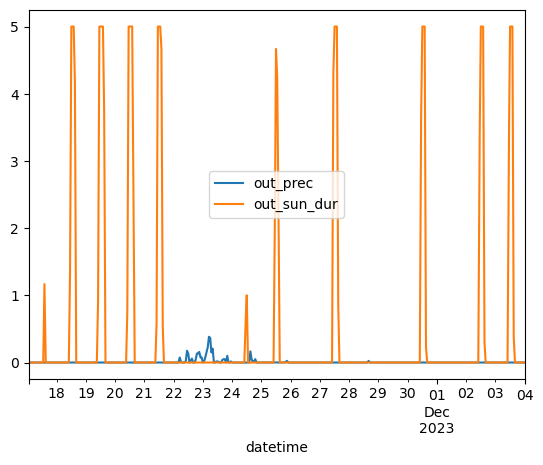

In [546]:
outdoor_data1.plot()  #[1776:]

In [12]:
outdoor_data = seklima_data.join(niludata, how='outer')
radiation_columns = ['out_prec', 'out_sun_dur']
outdoor_data1 = outdoor_data[radiation_columns].resample('5min').interpolate(method='linear').ffill()/12
outdoor_data2 = outdoor_data.drop(columns=radiation_columns,axis=1).resample('5min').interpolate(method='index')
outdoor_data_new = outdoor_data1.join(outdoor_data2, how='outer').round(3)

psychrolib_enth_hura(outdoor_data_new, 'out_press',  'out_RH', 'out_temp', 'out_enth', 'out_hura')

In [13]:
import_data = pd.read_csv(platform_directory + '/' + folder_my_own+ '/' + 'hospital data - miran.csv', delimiter=';' ).drop(columns=['timestep'])   #, delimiter=';' 
# hospital_data.set_index('datetime', inplace=True) 

time_zone_converter(import_data, 'Europe/Helsinki', 'Europe/Oslo','%d.%m.%Y %H:%M')
import_data['datetime'] = pd.to_datetime(import_data['datetime'])

import_data = import_data.set_index('datetime')

hospital_data = import_data.resample('5min').mean().round(2)
datedayhour_creator(hospital_data)
hospital_data['datetime'] =   hospital_data['datetime'].dt.strftime('%Y-%m-%d %H:%M')
hospital_data['datetime'] = pd.to_datetime(hospital_data['datetime'], format='%Y-%m-%d %H:%M')
hospital_data.set_index('datetime', inplace=True)

In [14]:
psychrolib_enth_hura(hospital_data, 'S25_press',  'S25_RH', 'S25_temp', 'S25_enth', 'S25_hura')
psychrolib_enth_hura(hospital_data, 'S26_press',  'S26_RH', 'S26_temp', 'S26_enth', 'S26_hura')
psychrolib_enth_hura(hospital_data, 'S27_press',  'S27_RH', 'S27_temp', 'S27_enth', 'S27_hura')
psychrolib_enth_hura(hospital_data, 'S28_press',  'S28_RH', 'S28_temp', 'S28_enth', 'S28_hura')
psychrolib_enth_hura(hospital_data, 'S16_press',  'S16_RH', 'S16_temp', 'S16_enth', 'S16_hura')
psychrolib_enth_hura(hospital_data, 'S15_press',  'S15_RH', 'S15_temp', 'S15_enth', 'S15_hura')
psychrolib_enth_hura(hospital_data, 'S14_press',  'S14_RH', 'S14_temp', 'S14_enth', 'S14_hura')
psychrolib_enth_hura(hospital_data, 'S13_press',  'S13_RH', 'S13_temp', 'S13_enth', 'S13_hura')
psychrolib_enth_hura(hospital_data, 'S25_press',  'S25_RH', 'S25_temp', 'S25_enth', 'S25_hura')

In [15]:
all_data = hospital_data.join(outdoor_data_new, how='outer').dropna(axis=0)
all_data.columns

Index(['S25_temp', 'S25_RH', 'S25_press', 'S25_co2', 'S25_tvoc', 'S26_temp',
       'S26_RH', 'S26_press', 'S26_co2', 'S26_tvoc', 'S27_temp', 'S27_RH',
       'S27_press', 'S27_co2', 'S27_tvoc', 'S28_temp', 'S28_RH', 'S28_press',
       'S28_co2', 'S28_tvoc', 'S42_pm1', 'S42_pm2.5', 'S42_pm4', 'S42_pm10',
       'S42_pm1_ave', 'S42_pm25_ave', 'S42_pm4_ave', 'S42_pm10_ave',
       'S15_temp', 'S15_RH', 'S15_press', 'S15_co2', 'S15_press_del',
       'S14_temp', 'S14_RH', 'S14_press', 'S14_co2', 'S14_press_del',
       'S13_temp', 'S13_RH', 'S13_press', 'S13_co2', 'S13_press_del',
       'S16_temp', 'S16_RH', 'S16_press', 'S16_co2', 'S16_press_del', 'date',
       'day', 'hour', 'S25_enth', 'S25_hura', 'S26_enth', 'S26_hura',
       'S27_enth', 'S27_hura', 'S28_enth', 'S28_hura', 'S16_enth', 'S16_hura',
       'S15_enth', 'S15_hura', 'S14_enth', 'S14_hura', 'S13_enth', 'S13_hura',
       'out_prec', 'out_sun_dur', 'out_temp', 'out_RH', 'out_snow',
       'out_sun_rad', 'out_press', 'out_

In [16]:
# workhour_data[[f for f in workhour_data.columns if f.startswith ('out') ]].columns
# workhour_data[['out_prec']].plot()   #, 'out_sun_dur','out_snow'

In [17]:
workhour_data = all_data[(all_data['hour']>8) & (all_data['hour']<18)]
index = ['date']
agg_function1 = 'mean'          #.round(2).astype(float)
agg_function2 = 'median'
agg_function3 = 'sum'
dfplot11 = pd.pivot_table(all_data, values=all_data.columns, aggfunc= agg_function1, index=index)
dfplot21 = pd.pivot_table(workhour_data, values=workhour_data.columns, aggfunc= agg_function1, index=index)
dfplot_sunrain = pd.pivot_table(workhour_data, values=radiation_columns, aggfunc= agg_function3, index=index)
dfplot12 = pd.pivot_table(all_data, values=all_data.columns, aggfunc= agg_function2, index=index)
dfplot22 = pd.pivot_table(workhour_data, values=workhour_data.columns, aggfunc= agg_function2, index=index)

In [18]:
def plotter_variable_end (df, variable_name, yscale_function, unit):
    plt.figure(figsize=(5,2))
    df[[f for f in df.columns if f.endswith(variable_name)]].plot()
    plt.xticks(rotation=30)
    plt.ylabel(variable_name + ' ' + unit)
    plt.yscale(value=yscale_function)
    plt.title ('hospital measurement of '+ '('  +variable_name +')')
    plt.show()
    
def plotter_variable_start (df, variable_name, yscale_function, unit):
    plt.figure(figsize=(5,2))
    df[[f for f in df.columns if f.startswith(variable_name)]].plot()
    plt.xticks(rotation=30)
    plt.ylabel(variable_name + ' ' + unit)
    plt.yscale(value=yscale_function)
    plt.title ('hospital measurement of '+ '('  +variable_name +')')
    plt.show()
    
def plotter_variable_start_end (df, variable_name_start, variable_name_end , yscale_function, unit):
    plt.figure(figsize=(5,2))
    df[[f for f in df.columns if f.startswith(variable_name_start) and f.endswith(variable_name_end)]].plot()
    plt.xticks(rotation=30)
    plt.ylabel(variable_name_end + ' ' + unit)
    plt.yscale(value=yscale_function)
    plt.title ('hospital measurement of '+ '('  +variable_name_end +')')
    plt.show()

<Figure size 500x200 with 0 Axes>

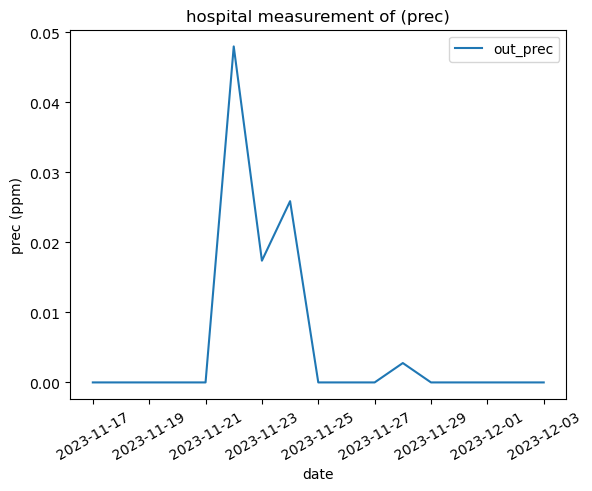

In [19]:
plotter_variable_start_end (dfplot21, 'out' , 'prec', 'linear' , '(ppm)')

In [20]:
all_data.columns

Index(['S25_temp', 'S25_RH', 'S25_press', 'S25_co2', 'S25_tvoc', 'S26_temp',
       'S26_RH', 'S26_press', 'S26_co2', 'S26_tvoc', 'S27_temp', 'S27_RH',
       'S27_press', 'S27_co2', 'S27_tvoc', 'S28_temp', 'S28_RH', 'S28_press',
       'S28_co2', 'S28_tvoc', 'S42_pm1', 'S42_pm2.5', 'S42_pm4', 'S42_pm10',
       'S42_pm1_ave', 'S42_pm25_ave', 'S42_pm4_ave', 'S42_pm10_ave',
       'S15_temp', 'S15_RH', 'S15_press', 'S15_co2', 'S15_press_del',
       'S14_temp', 'S14_RH', 'S14_press', 'S14_co2', 'S14_press_del',
       'S13_temp', 'S13_RH', 'S13_press', 'S13_co2', 'S13_press_del',
       'S16_temp', 'S16_RH', 'S16_press', 'S16_co2', 'S16_press_del', 'date',
       'day', 'hour', 'S25_enth', 'S25_hura', 'S26_enth', 'S26_hura',
       'S27_enth', 'S27_hura', 'S28_enth', 'S28_hura', 'S16_enth', 'S16_hura',
       'S15_enth', 'S15_hura', 'S14_enth', 'S14_hura', 'S13_enth', 'S13_hura',
       'out_prec', 'out_sun_dur', 'out_temp', 'out_RH', 'out_snow',
       'out_sun_rad', 'out_press', 'out_

<Figure size 500x200 with 0 Axes>

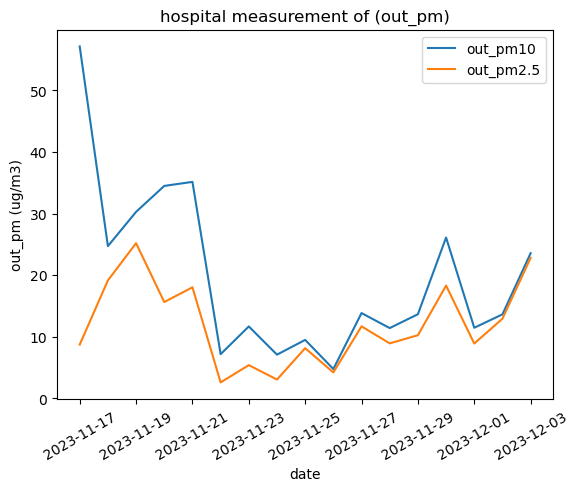

In [21]:
plotter_variable_start (dfplot21, 'out_pm'  , 'linear' , '(ug/m3)')

<Figure size 500x200 with 0 Axes>

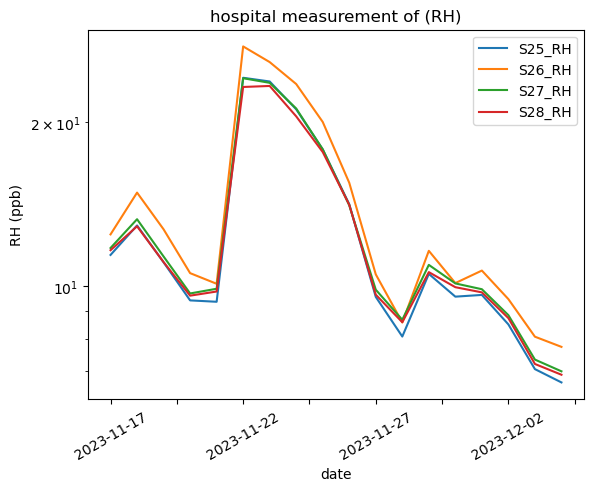

In [22]:
plotter_variable_start_end (dfplot12, 'S2'  , 'RH', 'log' , '(ppb)')

<Figure size 500x200 with 0 Axes>

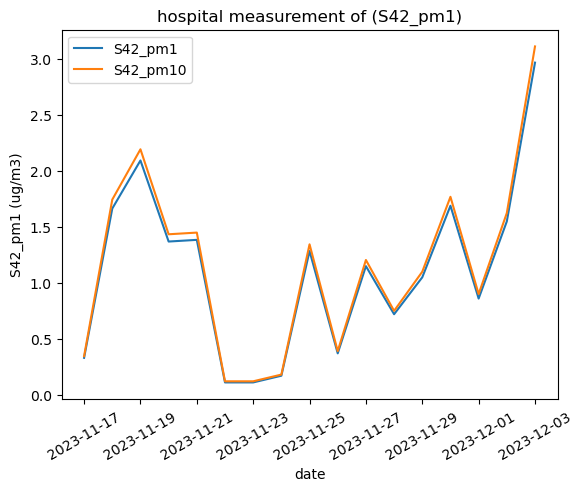

In [23]:
plotter_variable_start (dfplot22.drop(columns=[f for f in dfplot22.columns if f.endswith('ave')] ,axis=1), 'S42_pm1','linear' , '(ug/m3)')

<Figure size 500x200 with 0 Axes>

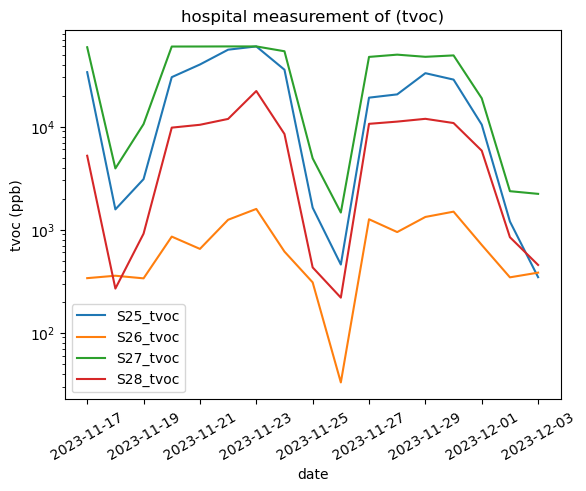

In [190]:
plotter_variable_end (dfplot22, 'tvoc','log' , '(ppb)')

In [24]:
questionnaire_data = pd.read_excel(platform_directory + '/' + folder_my_own+ '/' + 'questionnaire hospital - results v03.xlsx'   )
questionnaire_data['date'] = pd.to_datetime(questionnaire_data['date'] , format='%d.%m.%Y')
questionnaire_data['responses'] = 1
questionnaire_data['date'] = questionnaire_data['date'].dt.strftime('%Y-%m-%d')

input1 = questionnaire_data#[(hospital_data['hour']>8) & (hospital_data['hour']<18)]
index = ['date']
value0 = [ 'age', 'gender' , 'light_disease' ]
value1 = [ 'room_clean', 'air_clean', 'room_smell',
       'room_humidity', 'skin_wet', 'concentration', 'room_health',
       'room_dusty', 'room_electric']
value2 = ['symp_headache', 'symp_cough', 'symp_sneeze', 'symp_tired',
       'symp_dryeyes', 'symp_dryhands', 'responses']
agg_median = 'median'
agg_mean = 'count'
agg_sum = 'sum'
pivot_questionnaire = pd.pivot_table(input1, values=value0, aggfunc= agg_median, index=index).round(2).join(
    pd.pivot_table(input1, values=value1, aggfunc= agg_mean, index=index).round(2)).join(
        pd.pivot_table(input1, values=value2, aggfunc= agg_sum, index=index).round(2))
#dfplot_q = dfplot_q[dfplot_q['responses']>=4]

In [25]:
cols_to_move = ['date', 'day', 'age', 'room_humidity', 'skin_wet']
questionnaire_data         = questionnaire_data[ cols_to_move + [ col for col in questionnaire_data.columns if col not in cols_to_move ] ]

In [26]:
expected_date = ['2023-11-17', '2023-11-18', '2023-11-20', '2023-11-21',
               '2023-11-22', '2023-11-23', '2023-11-24', '2023-11-27',
               '2023-11-28', '2023-11-29', '2023-11-30']

In [27]:
answer_word2 = {1:'dissatisf.',2:'dissatisf.' , 3:'satisfied', 4:'satisfied', 5:'satisfied'}
answer_word3 = {1:'3. worst',0.5:'2. bad' , 0:'1. satisfied'}
answer_number2 = {1:1,2:0.5 , 3:0, 4:0, 5:0}
answer_number_2 = {1:0,2:0 , 3:0, 4:0.5, 5:1}
questionnaire_data2 = questionnaire_data.copy()
questionnaire_data2.iloc[:,3:12] = questionnaire_data2.iloc[:,3:12].replace(answer_number2)

questionnaire_data2 ['dry_room'] = questionnaire_data2['room_humidity'] .replace(answer_number2)
questionnaire_data2 ['dry_skin'] = questionnaire_data2['skin_wet'] .replace(answer_number2)
questionnaire_data2 ['wet_room'] = questionnaire_data2['room_humidity'] .replace(answer_number_2)
questionnaire_data2 ['wet_skin'] = questionnaire_data2['skin_wet'] .replace(answer_number_2)
# cols_to_move = ['date', 'day', 'age', 'wet_room','dry_room', 'wet_skin', 'dry_skin']
questionnaire_data2         = questionnaire_data2.drop(['room_humidity','skin_wet'], axis=1)

In [28]:
questionnaire_plot = questionnaire_data2.copy()
questionnaire_plot.iloc[:,3:10] = questionnaire_plot.iloc[:,3:10].replace(answer_word3)
questionnaire_plot ['dry_room'] = questionnaire_plot ['dry_room'].replace(answer_word3)
questionnaire_plot ['dry_skin'] = questionnaire_plot ['dry_skin'].replace(answer_word3)
# questionnaire_plot.iloc[:,10:12] = questionnaire_plot.iloc[:,10:12].replace({1:'worst.',2:'bad.' , 3:'satisfied'})

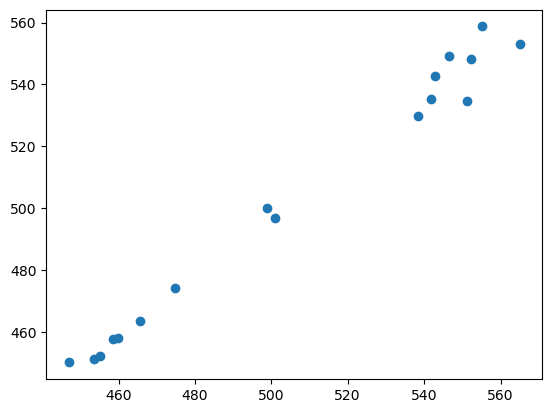

In [29]:
plt.scatter(dfplot22['S28_co2'], dfplot21['S28_co2'])

In [581]:
dfplot22.drop(columns=radiation_columns, axis=1).join(dfplot_sunrain, how='outer')

Index(['S13_RH', 'S13_co2', 'S13_enth', 'S13_hura', 'S13_press',
       'S13_press_del', 'S13_temp', 'S14_RH', 'S14_co2', 'S14_enth',
       'S14_hura', 'S14_press', 'S14_press_del', 'S14_temp', 'S15_RH',
       'S15_co2', 'S15_enth', 'S15_hura', 'S15_press', 'S15_press_del',
       'S15_temp', 'S16_RH', 'S16_co2', 'S16_enth', 'S16_hura', 'S16_press',
       'S16_press_del', 'S16_temp', 'S25_RH', 'S25_co2', 'S25_enth',
       'S25_hura', 'S25_press', 'S25_temp', 'S25_tvoc', 'S26_RH', 'S26_co2',
       'S26_enth', 'S26_hura', 'S26_press', 'S26_temp', 'S26_tvoc', 'S27_RH',
       'S27_co2', 'S27_enth', 'S27_hura', 'S27_press', 'S27_temp', 'S27_tvoc',
       'S28_RH', 'S28_co2', 'S28_enth', 'S28_hura', 'S28_press', 'S28_temp',
       'S28_tvoc', 'S42_pm1', 'S42_pm10', 'S42_pm10_ave', 'S42_pm1_ave',
       'S42_pm2.5', 'S42_pm25_ave', 'S42_pm4', 'S42_pm4_ave', 'day', 'hour',
       'out_RH', 'out_enth', 'out_hura', 'out_pm10', 'out_pm2.5', 'out_press',
       'out_snow', 'out_sun_rad', 'ou

In [30]:
measured_pivoted = dfplot22.drop(columns=radiation_columns, axis=1).join(dfplot_sunrain, how='outer')
expected_date = ['2023-11-17', '2023-11-18', '2023-11-20', '2023-11-21',
               '2023-11-22', '2023-11-23', '2023-11-27',
               '2023-11-28', '2023-11-29', '2023-11-30']

measured_pivoted.index= pd.to_datetime(measured_pivoted.index)  #.loc[:expected_date]
measured_pivoted.loc[expected_date]#.head(5)


,S13_RH,S13_co2,S13_enth,S13_hura,S13_press,S13_press_del,S13_temp,S14_RH,S14_co2,S14_enth,...,out_enth,out_hura,out_pm10,out_pm2.5,out_press,out_snow,out_sun_rad,out_temp,out_prec,out_sun_dur
date,,,,,,,,,,,,,,,,,,,,,
2023-11-17,11.160,477.850,28.575,1.970,1020.360,0.02,23.410,12.120,442.475,28.260,...,1.010,1.755,52.5830,6.6765,1004.8915,0.0,20.2425,-3.3415,0.000,13.999
2023-11-18,13.510,423.925,29.675,2.390,1020.010,0.02,23.435,14.920,417.575,29.365,...,1.290,2.310,22.3625,16.8575,1004.6625,0.0,30.1235,-4.4375,0.000,245.999
2023-11-20,10.110,526.825,27.670,1.770,1015.220,0.02,23.090,11.235,503.600,28.040,...,-4.420,1.525,33.7710,13.5435,999.6460,0.0,31.9065,-8.1670,0.000,279.000
2023-11-21,9.155,530.200,27.290,1.615,1022.895,0.02,23.050,9.925,497.125,27.525,...,-7.080,1.350,37.3805,19.6140,1007.2915,0.0,24.5465,-10.3790,0.000,250.002
2023-11-22,23.070,502.425,34.390,4.220,990.975,0.02,23.505,24.540,462.625,34.300,...,14.075,4.280,6.3000,2.1605,976.2875,0.0,1.1925,3.3000,5.183,0.000
2023-11-23,22.075,523.450,34.340,4.120,980.255,0.02,23.785,23.575,521.575,34.140,...,12.070,3.895,11.0190,5.4150,965.8125,0.0,6.1450,2.1000,1.878,0.000
2023-11-27,9.350,519.950,27.920,1.660,1019.615,0.02,23.560,10.215,475.850,27.610,...,-5.375,1.520,10.4030,8.7110,1003.9460,4.0,17.2460,-9.1375,0.000,242.001
2023-11-28,7.495,494.950,26.695,1.280,1015.195,0.02,23.195,8.420,479.100,26.875,...,-7.845,1.170,11.8420,9.0685,999.7790,4.0,6.6375,-10.7000,0.299,0.000
2023-11-29,10.365,497.050,28.105,1.845,1013.270,0.02,23.260,11.440,506.950,28.380,...,-0.805,1.930,13.6830,10.3545,997.8170,6.0,7.0950,-5.6335,0.000,0.000


In [31]:
measured_data = workhour_data.copy()

except_date = ['2023-11-16','2023-11-19', '2023-11-25', '2023-11-26', '2023-12-01', '2023-12-02', '2023-12-03', '2023-12-04']

measured_data =  measured_data.reset_index().set_index('date').loc[expected_date]
measured_data.set_index('datetime', inplace=True)

In [32]:
measured_data.columns

Index(['S25_temp', 'S25_RH', 'S25_press', 'S25_co2', 'S25_tvoc', 'S26_temp',
       'S26_RH', 'S26_press', 'S26_co2', 'S26_tvoc', 'S27_temp', 'S27_RH',
       'S27_press', 'S27_co2', 'S27_tvoc', 'S28_temp', 'S28_RH', 'S28_press',
       'S28_co2', 'S28_tvoc', 'S42_pm1', 'S42_pm2.5', 'S42_pm4', 'S42_pm10',
       'S42_pm1_ave', 'S42_pm25_ave', 'S42_pm4_ave', 'S42_pm10_ave',
       'S15_temp', 'S15_RH', 'S15_press', 'S15_co2', 'S15_press_del',
       'S14_temp', 'S14_RH', 'S14_press', 'S14_co2', 'S14_press_del',
       'S13_temp', 'S13_RH', 'S13_press', 'S13_co2', 'S13_press_del',
       'S16_temp', 'S16_RH', 'S16_press', 'S16_co2', 'S16_press_del', 'day',
       'hour', 'S25_enth', 'S25_hura', 'S26_enth', 'S26_hura', 'S27_enth',
       'S27_hura', 'S28_enth', 'S28_hura', 'S16_enth', 'S16_hura', 'S15_enth',
       'S15_hura', 'S14_enth', 'S14_hura', 'S13_enth', 'S13_hura', 'out_prec',
       'out_sun_dur', 'out_temp', 'out_RH', 'out_snow', 'out_sun_rad',
       'out_press', 'out_pm10', '

In [33]:
# Resample to daily frequency
measurement_columns = [f for f in measured_data.columns if f.startswith('S28')]+ ['S42_pm1', 'S42_pm2.5','S42_pm10' ]+ [f for f in measured_data.columns if f.startswith('out')]
measured_resampled = measured_data[measurement_columns].resample('12min').quantile(0.5)  # Assuming you want to use the maximum CO2 level for each day
timestep = 12

In [34]:
measured_resampled.describe()

,S28_temp,S28_RH,S28_press,S28_co2,S28_tvoc,S28_enth,S28_hura,S42_pm1,S42_pm2.5,S42_pm10,...,out_sun_dur,out_temp,out_RH,out_snow,out_sun_rad,out_press,out_pm10,out_pm2.5,out_enth,out_hura
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,23.549300,13.310556,1009.782389,530.386556,10818.371111,29.823311,2.409922,1.095644,1.149400,1.149444,...,1.162964,-5.345090,80.775362,1.927498,21.701160,995.678512,23.616717,11.945949,-0.072556,2.126233
std,0.291966,5.015248,13.347662,49.859202,7157.941556,2.618668,0.977941,0.797044,0.835713,0.835729,...,1.914511,4.828591,8.980719,2.417922,27.898940,13.040312,16.786029,7.696560,7.299171,1.012889
min,22.730000,7.640000,977.020000,420.650000,55.550000,26.660000,1.345000,0.060000,0.070000,0.070000,...,0.000000,-12.262500,53.333000,0.000000,-5.324000,963.712500,2.579000,0.112500,-9.480000,1.090000
25%,23.326250,10.132500,1010.708750,498.468750,6503.656250,28.246250,1.810000,0.335000,0.351250,0.351250,...,0.000000,-9.320500,76.343625,0.000000,-0.153375,996.506250,11.040500,6.759750,-5.740000,1.445000
50%,23.542500,11.205000,1013.917500,536.150000,10354.400000,28.772500,1.995000,1.047500,1.097500,1.097500,...,0.000000,-6.537500,83.416500,0.000000,11.008750,999.660500,17.323250,10.354500,-2.322500,1.662500
75%,23.770000,14.322500,1018.530000,567.218750,13880.718750,29.998750,2.530000,1.472500,1.542500,1.542500,...,1.765750,-2.655250,87.479125,4.000000,35.007750,1004.296875,32.031250,16.110500,2.563750,2.390000
max,24.355000,24.965000,1023.035000,749.000000,35511.300000,36.615000,4.790000,3.855000,4.040000,4.040000,...,5.000000,6.037500,94.875000,6.875000,100.055000,1008.475000,78.216000,46.601500,14.830000,4.350000


In [593]:
# def threshold_calculator_linear (df, column_check, new_column, threshold_number, duration):
#     df[new_column] = np.where(df[column_check] > threshold_number, duration, 0)
# def threshold_calculator_parabolic (df, column_check, new_column, lower_limit, higher_limit, duration):
#     df[new_column] = np.where((df[column_check] > higher_limit) | (df[column_check] < lower_limit), duration, 0)

# threshold_calculator_linear (measured_resampled, 'S25_co2', 'co2_>', 500,timestep)
# threshold_calculator_linear (measured_resampled, 'S25_tvoc', 'tvoc_>', 400,timestep)
# threshold_calculator_linear (measured_resampled, 'S42_pm1', 'pm1_>', 1,timestep)
# threshold_calculator_linear (measured_resampled, 'S42_pm2.5', 'pm2.5_>', 1,timestep)
# threshold_calculator_parabolic (measured_resampled, 'S25_temp', 'temp_>', 21,23,timestep)
# threshold_calculator_parabolic (measured_resampled, 'S25_RH', 'RH_>', 30,60,timestep)


In [35]:
# Define a function to apply the conditions
def categorize_limit_1(df, new_col_name, col_data, value1):
    def categorize_value(value, value1):
        if value  > value1:
            return 1
        else:
            return 0
    df[new_col_name] = df[col_data].apply(lambda x: categorize_value(x, value1))
    
# Define a function to apply the conditions
def categorize_limit_2(df, new_col_name, col_data, value1, value2):
    def categorize_value(value, value1, value2):
        if value  > value2:
            return 2
        elif value1 <= value < value2:
            return 1
        else:
            return 0
    df[new_col_name] = df[col_data].apply(lambda x: categorize_value(x, value1, value2))
    
def categorize_between_1(df, new_col_name, col_data, value1, value2):   
    def categorize_value(value, value1, value2):
        if value < value1:
            return 1
        elif value >= value1 and value < value2:
            return 0
        elif value >= value2:
            return 1
        else:
            return 0
    df[new_col_name] = df[col_data].apply(lambda x: categorize_value(x, value1, value2))

def categorize_between_2(df, new_col_name, col_data, value1, value2, value3,value4):    
    def categorize_value(value, value1, value2, value3,value4):
        if value < value1 or value > value4:
            return 2
        elif value1 <= value < value2 or value3 <= value <= value4:
            return 1
        else:
            return 0
    df[new_col_name] = df[col_data].apply(lambda x: categorize_value(x, value1, value2, value3,value4))
#df['new_column'] = df['column1'].apply(lambda x: categorize_value(x))

In [59]:
categorize_between_1(measured_resampled, '>_temp_>', 'S28_temp', 22.5, 23.5)
categorize_between_1(measured_resampled, '>_RH_>', 'S28_RH', 30, 60)
categorize_limit_1(measured_resampled, 'co2_>', 'S28_co2', 513)
categorize_limit_1(measured_resampled, 'tvoc_>', 'S28_tvoc', 12793)
categorize_between_1(measured_resampled, '>_enth_>', 'S28_enth', 31, 43)
categorize_between_1(measured_resampled, '>_hura_>', 'S28_hura', 4.3,7.4)
categorize_limit_1(measured_resampled, 'pm1_>', 'S42_pm1', 0.975)
categorize_limit_1(measured_resampled, 'pm2.5_>', 'S42_pm2.5', 1.0)

In [37]:
measured_resampled.describe()

,S28_temp,S28_RH,S28_press,S28_co2,S28_tvoc,S28_enth,S28_hura,S42_pm1,S42_pm2.5,S42_pm10,...,out_enth,out_hura,>_temp_>,>_RH_>,co2_>,tvoc_>,>_enth_>,>_hura_>,pm1_>,pm2.5_>
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000,1605.000000
mean,23.549300,13.310556,1009.782389,530.386556,10818.371111,29.823311,2.409922,1.095644,1.149400,1.149444,...,-0.072556,2.126233,0.274143,0.280374,0.185047,0.147040,0.003738,0.228660,0.153894,0.161371
std,0.291966,5.015248,13.347662,49.859202,7157.941556,2.618668,0.977941,0.797044,0.835713,0.835729,...,7.299171,1.012889,0.446221,0.449322,0.388457,0.354257,0.061046,0.420101,0.360960,0.367987
min,22.730000,7.640000,977.020000,420.650000,55.550000,26.660000,1.345000,0.060000,0.070000,0.070000,...,-9.480000,1.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.326250,10.132500,1010.708750,498.468750,6503.656250,28.246250,1.810000,0.335000,0.351250,0.351250,...,-5.740000,1.445000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.542500,11.205000,1013.917500,536.150000,10354.400000,28.772500,1.995000,1.047500,1.097500,1.097500,...,-2.322500,1.662500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.770000,14.322500,1018.530000,567.218750,13880.718750,29.998750,2.530000,1.472500,1.542500,1.542500,...,2.563750,2.390000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.355000,24.965000,1023.035000,749.000000,35511.300000,36.615000,4.790000,3.855000,4.040000,4.040000,...,14.830000,4.350000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
except_date3 = ['2023-11-19', '2023-11-24', '2023-11-25', '2023-11-26']
desired_threshold = ['co2_>', 'tvoc_>', 'pm1_>', 'pm2.5_>', '>_temp_>', '>_RH_>','>_enth_>','>_hura_>']

threshold_data = measured_resampled[desired_threshold].resample('D').sum().drop(except_date3,axis=0).round(2)/(60/timestep)
threshold_data.index = threshold_data.index.rename('date')#.index
threshold_data

,co2_>,tvoc_>,pm1_>,pm2.5_>,>_temp_>,>_RH_>,>_enth_>,>_hura_>
date,,,,,,,,
2023-11-17,2.6,0.0,1.4,1.4,0.4,9.0,9.0,9.0
2023-11-18,0.0,0.0,7.6,7.6,0.0,9.0,9.0,9.0
2023-11-20,6.6,1.2,9.0,9.0,3.8,9.0,9.0,9.0
2023-11-21,8.2,1.0,8.8,8.8,5.2,9.0,9.0,9.0
2023-11-22,7.2,4.0,0.0,0.0,7.6,9.0,0.0,2.8
2023-11-23,7.6,8.0,0.0,0.0,7.0,9.0,0.0,4.8
2023-11-27,6.0,2.2,6.8,7.4,6.2,9.0,9.0,9.0
2023-11-28,6.4,3.4,0.8,1.6,7.2,9.0,9.0,9.0
2023-11-29,7.4,4.0,6.0,7.0,7.6,9.0,9.0,9.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

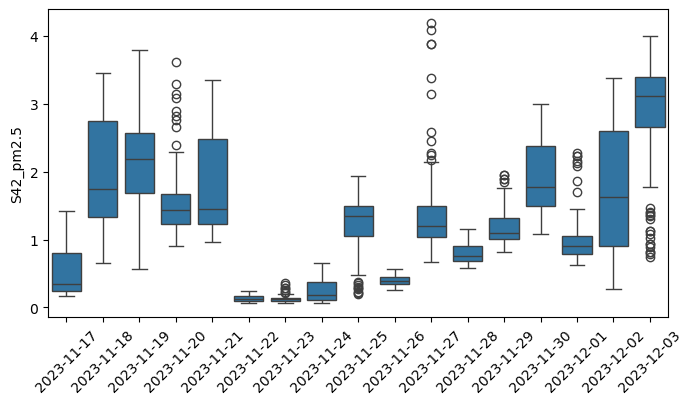

In [61]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=workhour_data.index.date, y='S42_pm2.5', data=workhour_data)
plt.xticks( horizontalalignment='center',rotation=45)

In [78]:
questionnaire_data2.describe()

,day,age,room_clean,air_clean,room_smell,concentration,room_health,room_dusty,room_electric,gender,...,symp_cough,symp_sneeze,symp_tired,symp_dryeyes,symp_dryhands,responses,dry_room,dry_skin,wet_room,wet_skin
count,82.000000,82.000000,82.000000,82.000000,81.000000,82.000000,81.000000,82.000000,82.000000,78.000000,...,17.0,12.0,25.0,45.0,50.0,82.0,82.000000,82.000000,82.000000,82.000000
mean,7.585366,3.890244,0.067073,0.134146,0.018519,0.115854,0.179012,0.158537,0.280488,1.910256,...,1.0,1.0,1.0,1.0,1.0,1.0,0.554878,0.560976,0.262195,0.292683
std,4.175032,0.566691,0.171453,0.272718,0.095015,0.252136,0.288408,0.322778,0.452002,0.287664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.342522,0.318079,0.251239,0.247845
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000
25%,4.250000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.500000,0.500000,0.000000,0.000000
50%,6.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.500000,0.500000,0.500000,0.500000
75%,11.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.500000,0.500000
max,16.000000,5.000000,0.500000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.500000,0.500000


In [76]:
except_date2 = ['2023-11-19', '2023-11-25', '2023-11-26', '2023-12-01',
               '2023-12-02', '2023-12-03']
# value15 = [ 'room_clean', 'air_clean', 'room_smell',
#         'concentration', 'room_health','wet_room', 'dry_room','wet_skin','dry_skin']
# value13 = ['room_dusty', 'room_electric']
# answer_replace15 = { 4:0, 5:0, 3:0.5 , 1:1,2:1 }
# answer_replace13 = {1:1, 2:0.5, 3:0}

questionnaire_filtered = questionnaire_data2.drop(['day','gender'], axis=1) .copy()
questionnaire_filtered['date'] = pd.to_datetime(questionnaire_filtered['date'])

questionnaire_filtered = questionnaire_filtered.set_index('date')#.drop( except_date2 , axis=0)
questionnaire_age = questionnaire_filtered[['age']].resample('D').mean().drop( except_date2 , axis=0)

# questionnaire_filtered.loc[:,value15] = questionnaire_filtered.loc[:,value15].replace(answer_replace15)
# questionnaire_filtered.loc[:,value13] = questionnaire_filtered.loc[:,value13].replace(answer_replace13)
questionnaire_filtered = questionnaire_filtered.resample('D').sum().drop( except_date2 , axis=0)

cols_to_move = [ 'age','dry_room', 'dry_skin', 'wet_room','wet_skin']
questionnaire_filtered         = questionnaire_filtered[ cols_to_move + [ col for col in questionnaire_filtered.columns if col not in cols_to_move ] ]

questionnaire_filtered.iloc[:,:-1] = questionnaire_filtered.iloc[:,:-1]#.div(questionnaire_filtered['responses']/100, axis=0)
questionnaire_filtered= questionnaire_filtered.drop('age', axis=1).join(questionnaire_age).round(4)

In [77]:
questionnaire_filtered

,dry_room,dry_skin,wet_room,wet_skin,room_clean,air_clean,room_smell,concentration,room_health,room_dusty,room_electric,light_disease,symp_headache,symp_cough,symp_sneeze,symp_tired,symp_dryeyes,symp_dryhands,responses,age
date,,,,,,,,,,,,,,,,,,,,
2023-11-17,4.0,3.5,2.0,2.5,0.5,0.0,0.5,0.5,0.5,1.0,2,14.0,0.0,2.0,2.0,2.0,4.0,5.0,6,3.5000
2023-11-18,2.5,2.5,1.5,1.5,0.0,0.5,0.0,0.0,0.5,0.5,0,11.0,0.0,0.0,1.0,0.0,3.0,2.0,4,4.2500
2023-11-20,5.0,5.5,2.0,1.5,0.0,2.0,0.0,1.5,1.5,1.0,2,25.0,2.0,3.0,1.0,2.0,4.0,4.0,9,3.8889
2023-11-21,5.5,5.0,2.5,2.0,1.0,2.0,0.0,0.0,2.5,1.5,4,19.0,0.0,1.0,3.0,2.0,5.0,6.0,8,3.6250
2023-11-22,5.0,6.0,2.0,2.0,0.0,1.5,0.0,0.5,3.0,0.5,3,29.0,1.0,2.0,2.0,5.0,5.0,6.0,12,4.0000
2023-11-23,4.0,4.0,1.0,1.0,0.5,1.0,0.0,2.5,1.5,0.5,2,21.0,2.0,1.0,0.0,5.0,3.0,4.0,7,3.8571
2023-11-24,1.5,2.0,0.5,1.0,0.5,1.0,0.0,0.5,0.5,1.0,1,9.0,0.0,0.0,0.0,1.0,3.0,2.0,3,3.6667
2023-11-27,4.0,4.0,1.0,2.0,0.5,0.5,0.0,1.0,1.5,0.5,3,15.0,1.0,2.0,1.0,2.0,2.0,4.0,7,3.8571
2023-11-28,3.0,3.0,2.0,2.0,0.5,0.5,0.0,0.5,0.5,1.0,0,19.0,0.0,2.0,0.0,2.0,4.0,4.0,7,4.1429


In [565]:
# input2 = questionnaire_data
# index = ['date']
# value0 = [ 'age', 'gender' , 'light_disease' ]
# value1 = [ 'room_clean', 'air_clean', 'room_smell',
#        'room_humidity', 'skin_wet', 'concentration', 'room_health',
#        'room_dusty', 'room_electric']
# value2 = ['symp_headache', 'symp_cough', 'symp_sneeze', 'symp_tired',
#        'symp_dryeyes', 'symp_dryhands', 'responses']
# agg_median = 'median'
# agg_mean = 'mean'
# agg_sum = 'sum'
# pivot_questionnaire = pd.pivot_table(input2, values=value0, aggfunc= agg_median, index=index).round(2).join(
#     pd.pivot_table(input2, values=value1, aggfunc= agg_mean, index=index).round(2)).join(
#         pd.pivot_table(input2, values=value2, aggfunc= agg_sum, index=index).round(2))
# pivot_questionnaire.head(5)  #

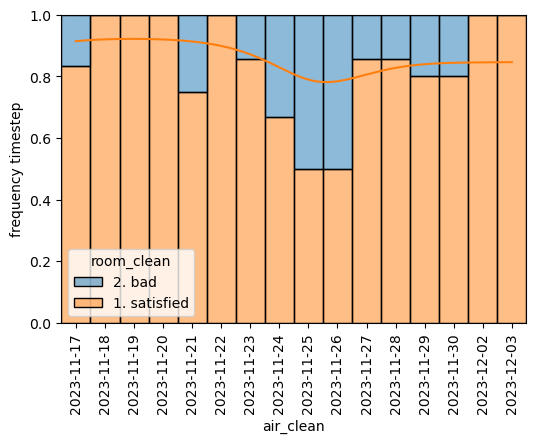

In [64]:
plt.figure(figsize=(6, 4))
sns.histplot(  data=questionnaire_plot, x='date', legend='auto', hue='room_clean', multiple= 'fill', stat='percent', kde=True)   
plt.xlabel('air_clean')
plt.ylabel('frequency timestep')
plt.xticks( horizontalalignment='center',rotation=90)
plt.show()


<AxesSubplot:xlabel='datetime', ylabel='S28_co2'>

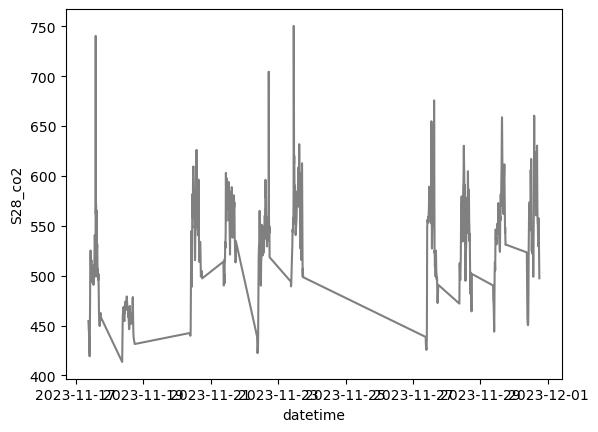

In [65]:
sns.lineplot(x=measured_data.index , y= 'S28_co2', data=measured_data , color= 'grey')

In [379]:
measured_resampled.columns

Index(['S28_RH', 'S28_co2', 'S28_enth', 'S28_hura', 'S28_press', 'S28_temp',
       'S28_tvoc', 'S42_pm1', 'S42_pm2.5', 'S42_pm10', 'out_RH', 'out_enth',
       'out_hura', 'out_pm10', 'out_pm2.5', 'out_prec', 'out_press',
       'out_snow', 'out_sun_dur', 'out_sun_rad', 'out_temp', '>_temp_>',
       '>_RH_>', 'co2_>', 'tvoc_>', '>_enth_>', '>_hura_>', 'pm1_>',
       'pm2.5_>'],
      dtype='object')

<AxesSubplot:xlabel='date', ylabel='Percent'>

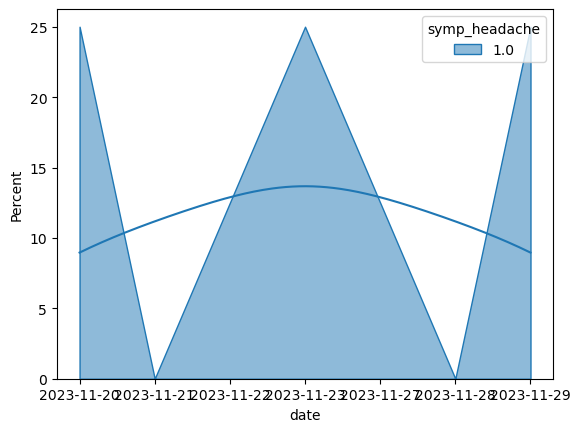

In [66]:
sns.histplot(  data=questionnaire_plot.set_index('date').loc[expected_date], x='date', legend='auto', 
             element= 'poly', hue='symp_headache', multiple= 'dodge', stat='percent', kde=True)   
# sns.histplot( data=data_questionnaire,x='date',ax= ax1, multiple= 'stack', hue=col_ieq_perception,kde=True, hue_order= hue_ordered_list , element= 'poly', palette="light:#5A9", stat='percent')    #,legend='auto', stat='percent', 


In [44]:
def combined_plot (  data_measured, data_questionnaire, col_ieq_measured, col_ieq_measured_unit , col_ieq_perception,hue_ordered_list):
# Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(6, 7))
    # Create a figure and subplots

    #sns.histplot(data=data_questionnaire,x='date', multiple='fill', hue=col_ieq_perception, hue_order= hue_ordered_list ,kde=True, stat='percent', palette="light:#5A9", element= 'poly')  
    sns.histplot( data=data_questionnaire,x='date',ax= ax1, multiple= 'fill', hue=col_ieq_perception,kde=True, element= 'poly',  stat='proportion', hue_order= hue_ordered_list, palette="light:#5A9")    #, hue_order= hue_ordered_list ,legend='auto', stat='percent', 

    plt.xticks( horizontalalignment='center',rotation=45)
    ax2 = ax1. twinx()

    # Plot df2 as a histplot on ax2
    sns.boxenplot(x=data_measured.index, fill=False, y=col_ieq_measured, ax=ax2, data=data_measured , color= 'red',  linewidth=1.5)
    #sns.lineplot(data=data_measured, x='date', y= col_ieq_measured, color= 'grey')

    plt.xticks( horizontalalignment='center',rotation=45)
    ax2.set_ylabel(col_ieq_measured + ' ' +col_ieq_measured_unit)

    # Set common x-axis label
    plt.xlabel('date')
    plt.xticks(  )
    plt.title(col_ieq_perception + '(%) & ' + col_ieq_measured)
    plt.show()
    
def combined_plot_nolegend (  data_measured, data_questionnaire, col_ieq_measured, col_ieq_measured_unit , col_ieq_perception):
# Create figure and primary axis
    fig, ax1 = plt.subplots(figsize=(6, 7))
    # Create a figure and subplots

    #sns.histplot(data=data_questionnaire,x='date', multiple='fill', hue=col_ieq_perception, hue_order= hue_ordered_list ,kde=True, stat='percent', palette="light:#5A9", element= 'poly')  
    sns.histplot( data=data_questionnaire,x='date',ax= ax1, multiple= 'stack', hue=col_ieq_perception,kde=True, stat='frequency', legend=False, palette='pastel')    #, hue_order= hue_ordered_list ,legend='auto', stat='percent', 

    plt.xticks( horizontalalignment='center',rotation=45)
    ax2 = ax1. twinx()

    # Plot df2 as a histplot on ax2
    sns.boxenplot(x=data_measured.index, fill=False, y=col_ieq_measured, ax=ax2, data=data_measured , color= 'red',  linewidth=1.5)
    #sns.lineplot(data=data_measured, x='date', y= col_ieq_measured, color= 'grey')

    plt.xticks( horizontalalignment='center',rotation=45)
    ax2.set_ylabel(col_ieq_measured + ' ' +col_ieq_measured_unit)

    # Set common x-axis label
    plt.xlabel('date')
    plt.xticks(  )
    plt.title(col_ieq_perception + '(%) & ' + col_ieq_measured)
    plt.show()

In [45]:
questionnaire_plot.columns

Index(['date', 'day', 'age', 'room_clean', 'air_clean', 'room_smell',
       'concentration', 'room_health', 'room_dusty', 'room_electric', 'gender',
       'light_disease', 'symp_headache', 'symp_cough', 'symp_sneeze',
       'symp_tired', 'symp_dryeyes', 'symp_dryhands', 'responses', 'dry_room',
       'dry_skin', 'wet_room', 'wet_skin'],
      dtype='object')

In [67]:
pd.pivot_table( data=questionnaire_data[['date']+[f for f in questionnaire_data.columns if f.startswith('symp')]], 
               index = ['date'], 
               values=[f for f in questionnaire_data.columns if f.startswith('symp')], aggfunc='sum').describe()

,symp_cough,symp_dryeyes,symp_dryhands,symp_headache,symp_sneeze,symp_tired
count,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,1.06250,2.812500,3.125000,0.500000,0.750000,1.562500
std,1.12361,1.470544,1.962142,0.816497,0.930949,1.547848
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,1.000000,0.000000,0.000000,0.750000
50%,1.00000,3.000000,4.000000,0.000000,0.500000,1.000000
75%,2.00000,4.000000,4.250000,1.000000,1.000000,2.000000
max,3.00000,5.000000,6.000000,2.000000,3.000000,5.000000


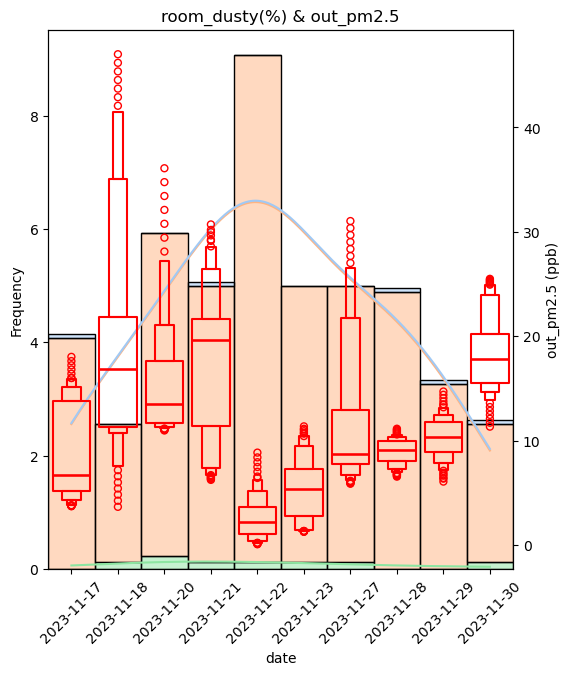

In [189]:
combined_plot_nolegend(workhour_data.set_index('date').loc[expected_date], 
              questionnaire_plot.set_index('date').loc[expected_date],  
              'out_pm2.5', '(ppb)', 'room_dusty') #

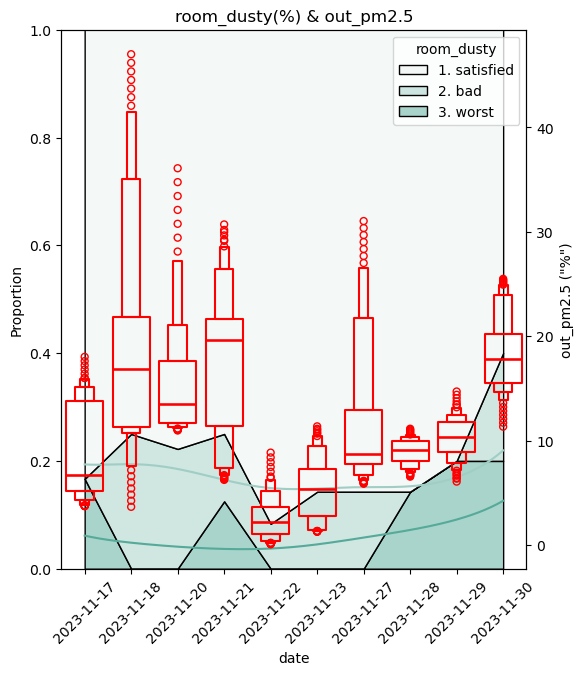

In [190]:
combined_plot(workhour_data.set_index('date').loc[expected_date], 
              questionnaire_plot.set_index('date').loc[expected_date],  
              'out_pm2.5', '("%")', 'room_dusty', ['1. satisfied', '2. bad', '3. worst']) #

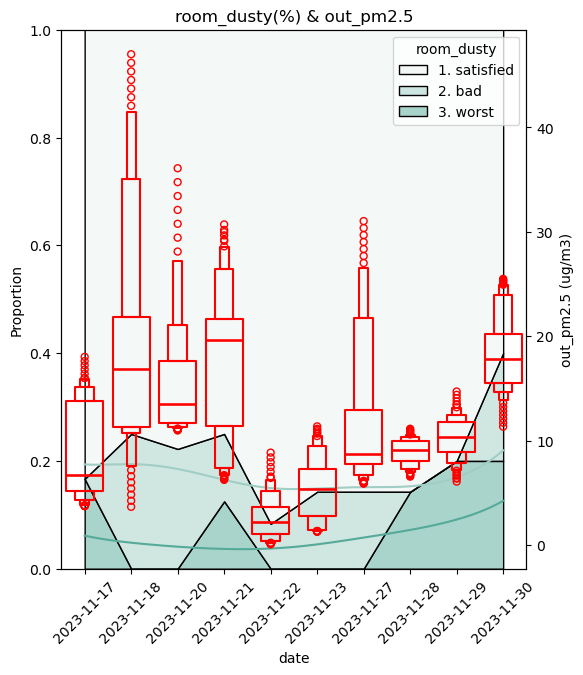

In [70]:
combined_plot(workhour_data.set_index('date').loc[expected_date], 
              questionnaire_plot.set_index('date').loc[expected_date],  
              'out_pm2.5', '(ug/m3)', 'room_dusty',  ['1. satisfied', '2. bad', '3. worst']) #

In [288]:
measured_pivoted.columns

Index(['S13_RH', 'S13_co2', 'S13_press', 'S13_press_del', 'S13_temp', 'S14_RH',
       'S14_co2', 'S14_press', 'S14_press_del', 'S14_temp', 'S15_RH',
       'S15_co2', 'S15_press', 'S15_press_del', 'S15_temp', 'S16_CO2',
       'S16_RH', 'S16_press', 'S16_press_del', 'S16_temp', 'S25_RH', 'S25_co2',
       'S25_press', 'S25_temp', 'S25_tvoc', 'S26_RH', 'S26_co2', 'S26_press',
       'S26_temp', 'S26_tvoc', 'S27_RH', 'S27_co2', 'S27_press', 'S27_temp',
       'S27_tvoc', 'S28_RH', 'S28_co2', 'S28_press', 'S28_temp', 'S28_tvoc',
       'S42_pm1', 'S42_pm10', 'S42_pm10_ave', 'S42_pm1_ave', 'S42_pm2.5',
       'S42_pm25_ave', 'S42_pm4', 'S42_pm4_ave', 'day', 'hour'],
      dtype='object')

In [71]:
input_graph = threshold_data .join( questionnaire_filtered).round(4).drop(['2023-11-20'],axis=0)
input_graph_pivot = measured_pivoted[measurement_columns]  .join(questionnaire_filtered ).round(4).drop(['2023-11-24','2023-11-20'],axis=0).dropna()

In [72]:
with pd.ExcelWriter(platform_directory + '/' + folder_my_own+ '/' + 'hospital pivot_.xlsx') as writer:
   
    # use to_excel function and specify the sheet_name and index 
    # to store the dataframe in specified sheet
    dfplot11.to_excel(writer, sheet_name=agg_function1 + "_alltime", index=True)
    dfplot21.to_excel(writer, sheet_name=agg_function1 + "_selectedhours", index=True)
    dfplot12.to_excel(writer, sheet_name=agg_function2 + "_alltime", index=True)
    dfplot22.to_excel(writer, sheet_name=agg_function2 + "_selectedhours", index=True)
    dfplot_sunrain.to_excel(writer, sheet_name=agg_function3 + "_sun_rain", index=True)
    pivot_questionnaire.to_excel(writer, sheet_name="questionnaire", index=True)
    all_data.to_excel(writer, sheet_name='all_data', index=True)
    workhour_data.to_excel(writer, sheet_name='workhour_data', index=True)

In [73]:
with pd.ExcelWriter(platform_directory + '/' + folder_my_own+ '/' + 'hospital threshold and pivot_.xlsx') as writer:
   
    # use to_excel function and specify the sheet_name and index 
    # to store the dataframe in specified sheet
    input_graph.to_excel(writer, sheet_name='threshold', index=True)
    input_graph_pivot.to_excel(writer, sheet_name='pivot '+agg_function1, index=True)

In [659]:
input_graph.columns

Index(['co2_>', 'tvoc_>', 'pm1_>', 'pm2.5_>', '>_temp_>', '>_RH_>', '>_enth_>',
       '>_hura_>', 'dry_room', 'dry_skin', 'wet_room', 'wet_skin',
       'room_clean', 'air_clean', 'room_smell', 'concentration', 'room_health',
       'room_dusty', 'room_electric', 'light_disease', 'symp_headache',
       'symp_cough', 'symp_sneeze', 'symp_tired', 'symp_dryeyes',
       'symp_dryhands', 'responses', 'age'],
      dtype='object')

In [150]:
def plot_bubblegraph_satisfaction (df,x_axis,y_axis , word_ylabel, number, unit_xlabel):
    plt.figure(figsize=(4,3))
    sns.scatterplot(df, x= x_axis, y= y_axis, size=df['responses']*round(1), sizes=(10,200))
    plt.ylabel(number + ' person '  +  word_ylabel   +' about '+ y_axis)
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.xlabel(x_axis +' ' + unit_xlabel)

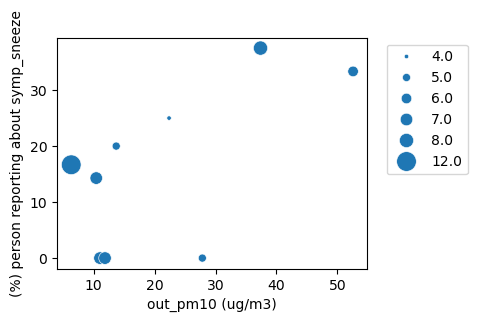

In [134]:
x_axis = 'out_pm10'
y_axis = 'symp_sneeze'
plot_bubblegraph_satisfaction(input_graph_pivot,x_axis ,y_axis, 'reporting', '(ug/m3)' )

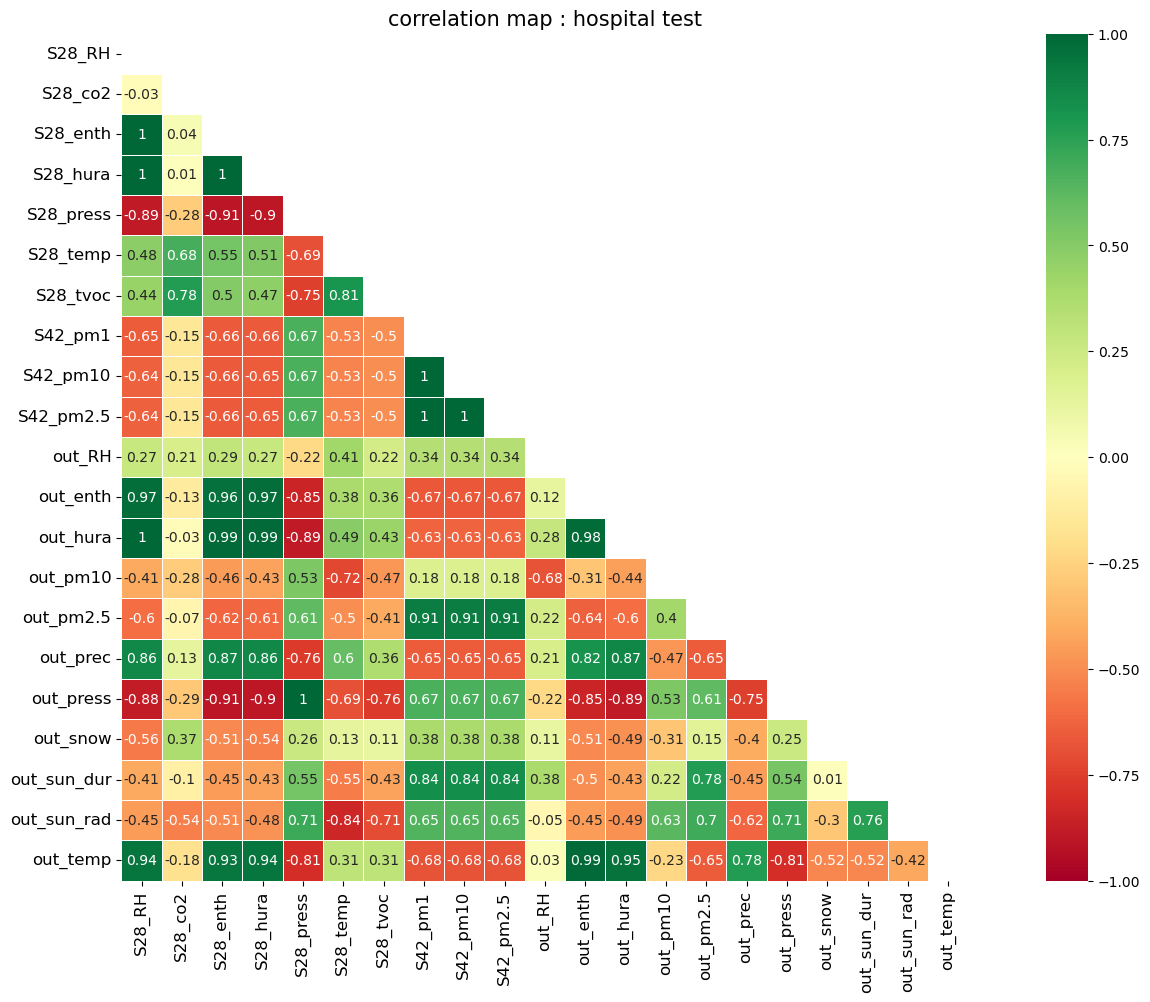

In [81]:
folder_heatmap = input_graph_pivot.copy()
heatmap_spearmanvalue(folder_heatmap[[f for f in folder_heatmap.columns if f.startswith('S28')]+ ['S42_pm1', 'S42_pm2.5','S42_pm10' ]+ [f for f in folder_heatmap.columns if f.startswith('out')]].sort_index(axis=1), 'hospital test')
# [f for f in folder_heatmap.columns if f.startswith('S28')]+ ['S42_pm1', 'S42_pm2.5','S42_pm10' ]+ [f for f in folder_heatmap.columns if f.startswith('out')]

In [413]:
input_graph_pivot.columns

Index(['S28_RH', 'S28_co2', 'S28_enth', 'S28_hura', 'S28_press', 'S28_temp',
       'S28_tvoc', 'S42_pm1', 'S42_pm2.5', 'S42_pm10', 'out_RH', 'out_enth',
       'out_hura', 'out_pm10', 'out_pm2.5', 'out_prec', 'out_press',
       'out_snow', 'out_sun_dur', 'out_sun_rad', 'out_temp', 'dry_room',
       'dry_skin', 'wet_room', 'wet_skin', 'room_clean', 'air_clean',
       'room_smell', 'concentration', 'room_health', 'room_dusty',
       'room_electric', 'light_disease', 'symp_headache', 'symp_cough',
       'symp_sneeze', 'symp_tired', 'symp_dryeyes', 'symp_dryhands',
       'responses', 'age'],
      dtype='object')

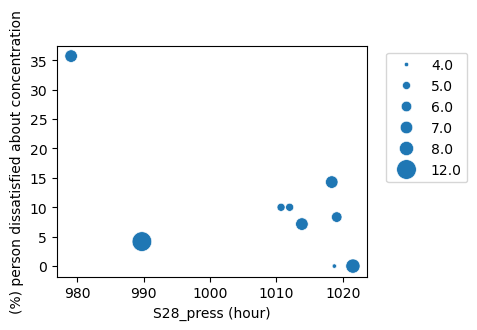

In [171]:
x_axis = 'S28_press'
y_axis = 'concentration'
plot_bubblegraph_satisfaction(input_graph_pivot,x_axis ,y_axis, 'dissatisfied', '(%)', '(hour)' )

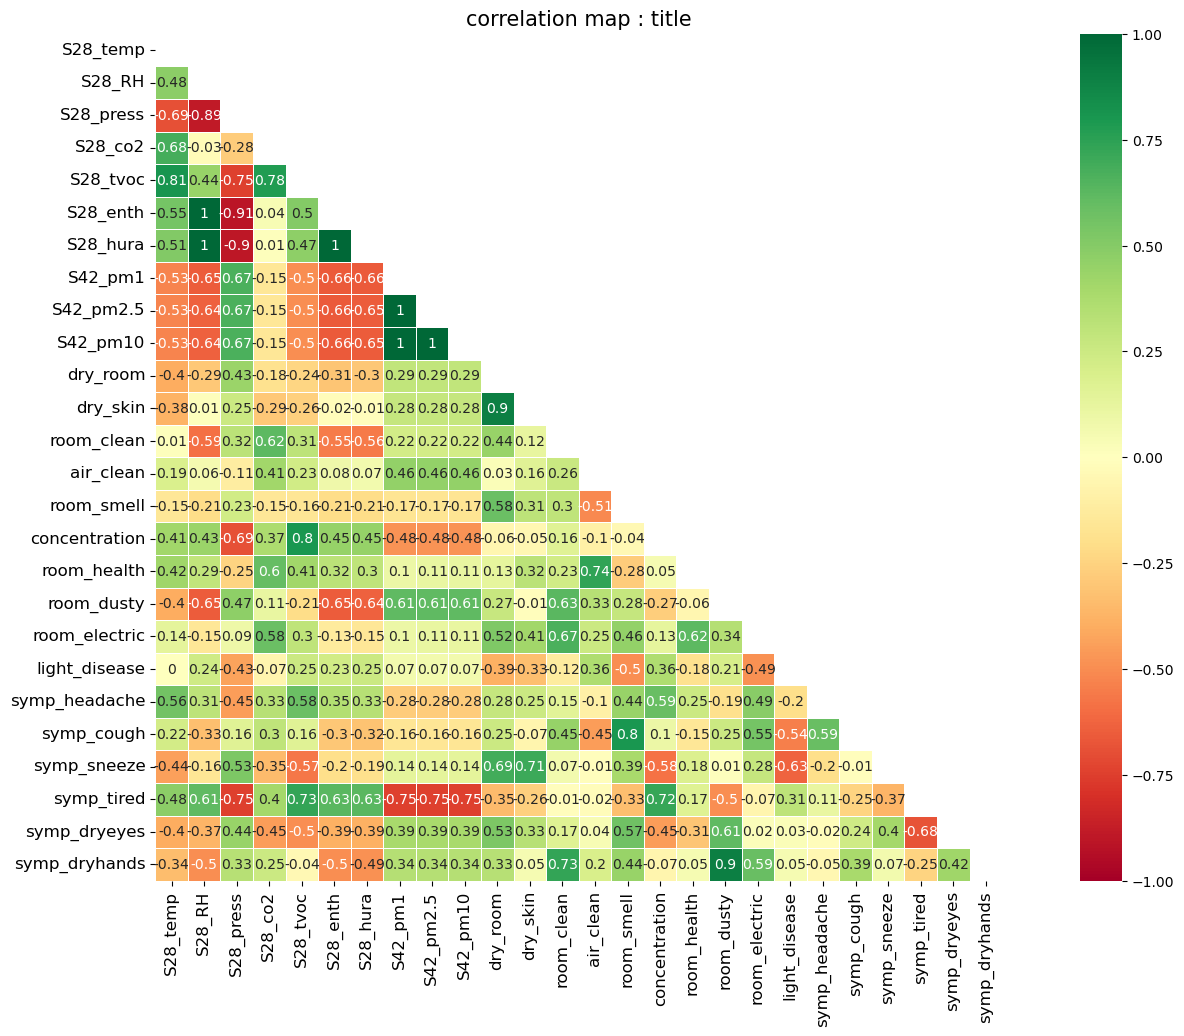

In [136]:
folder_heatmap = input_graph_pivot.copy()
heatmap_spearmanvalue(folder_heatmap.drop(columns=[f for f in folder_heatmap.columns if f.startswith('out')] +['wet_room', 'wet_skin','responses', 'age'],
                                          axis=1), 'title')

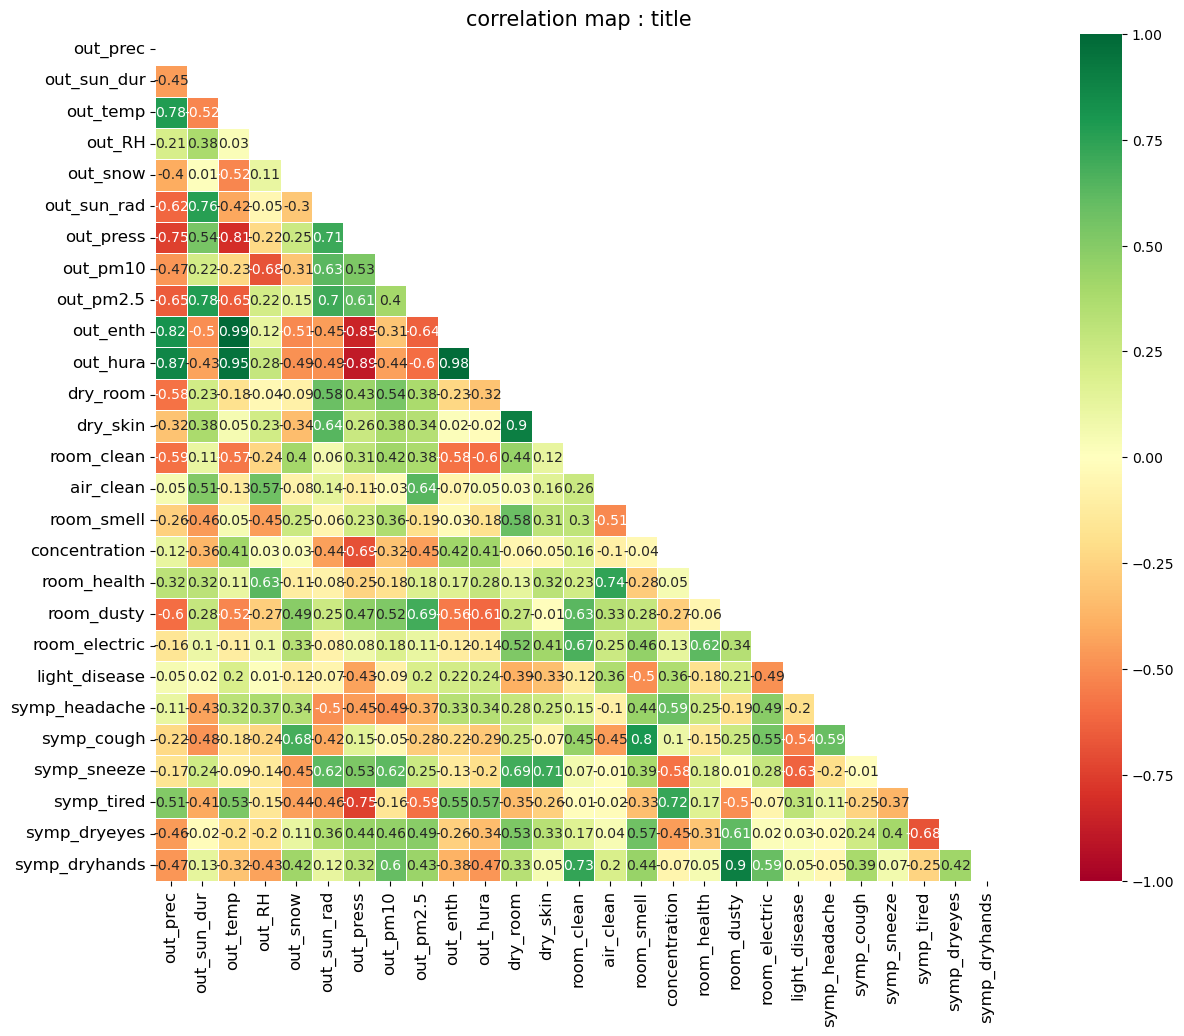

In [172]:
folder_heatmap = input_graph_pivot.copy()
heatmap_spearmanvalue(folder_heatmap.drop(columns=[f for f in folder_heatmap.columns if f.startswith('S')] +['wet_room', 'wet_skin','responses', 'age'],
                                          axis=1), 'title')

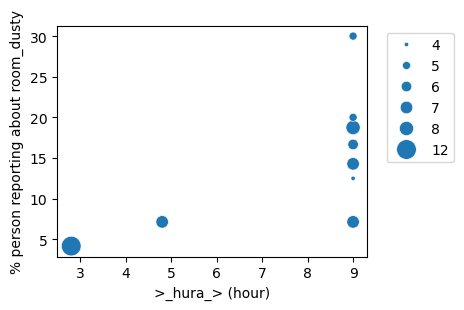

In [168]:
x_axis = '>_hura_>'
y_axis = 'room_dusty'
plot_bubblegraph_satisfaction(input_graph,x_axis ,y_axis, 'reporting','%', '(hour)' )

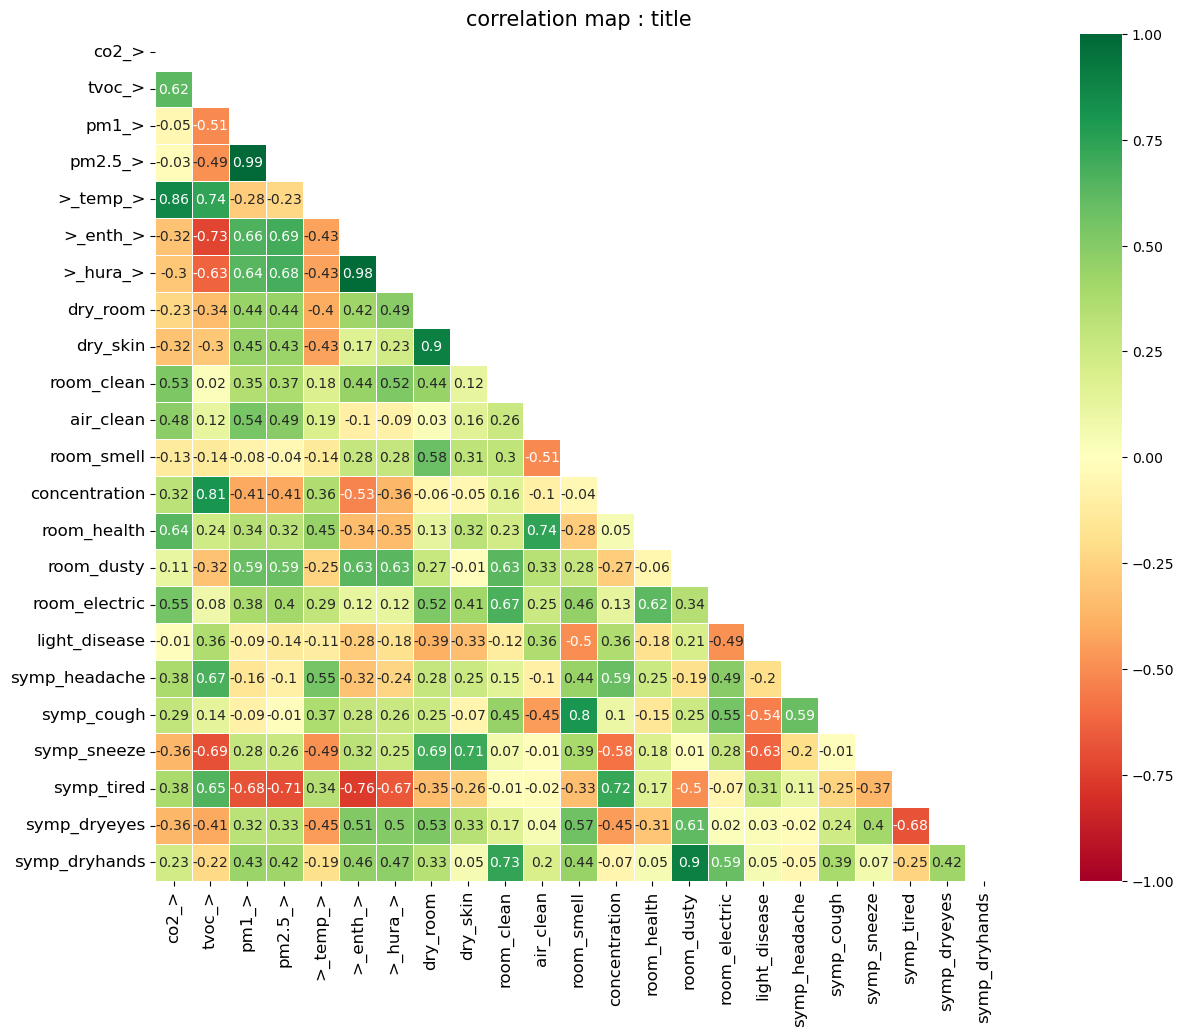

In [137]:
folder_heatmap = input_graph.copy()
heatmap_spearmanvalue(folder_heatmap.drop(columns=['>_RH_>']+ ['age','wet_room', 'wet_skin','responses'], axis=1), 'title')